## Project Description

## Financial Analysis and Predictive Modeling Project

In this project, we aim to analyze and predict the financial performance of multiple companies using historical data. The dataset contains key financial metrics such as revenue, market capitalization, profit margins, cash flows, employee count, and various financial ratios across multiple years. The focus is on understanding company performance through financial analysis, followed by building a predictive model to forecast future metrics, such as revenue, based on historical trends.

The project will be structured as follows:
1. **Data Understanding and Cleaning**: Ensure the dataset is complete, consistent, and free of anomalies by handling missing values and renaming any mislabeled columns.
2. **Exploratory Data Analysis (EDA)**: Visualize key financial metrics over time to uncover trends, patterns, and insights about company performance.
3. **Financial Ratio Analysis**: Analyze profitability, liquidity, solvency, and efficiency using financial ratios such as Return on Equity (ROE), Current Ratio, and Debt/Equity Ratio to assess company health.
4. **Cash Flow Analysis**: Examine cash flow statements to understand how companies generate and use cash, focusing on Free Cash Flow and its implications for investment and shareholder returns.
5. **Employee and Inflation Impact**: Investigate the relationship between employee productivity and financial outcomes, and analyze the effect of inflation on company performance.
6. **Predictive Modeling**: Develop a regression-based model to forecast future financial metrics (e.g., revenue) using historical financial data. Evaluate the model's accuracy and refine it for better predictions.

This comprehensive approach will provide a deep understanding of company performance over time and offer valuable foresight into future financial outcomes.

### Step 1: Data Understanding and Cleaning

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing dataset from the excel file
fs=pd.read_excel("Financial_Statements.xlsx")

In [3]:
fs

Year Company  Category  Market Cap(in B USD)   Revenue  Gross Profit  \
0    2022     AAPL       IT               2066.94  394328.0      170782.0   
1    2021     AAPL       IT               2913.28  365817.0      152836.0   
2    2020     AAPL       IT               2255.97  274515.0      104956.0   
3    2019     AAPL       IT               1304.76  260174.0       98392.0   
4    2018     AAPL       IT                748.54  265595.0      101839.0   
..    ...      ...      ...                   ...       ...           ...   
135  2013     AMZN     LOGI                182.54   74452.0       20271.0   
136  2012     AMZN     LOGI                113.63   61093.0       15122.0   
137  2011     AMZN     LOGI                 78.72   48077.0       10789.0   
138  2010     AMZN     LOGI                 80.79   34204.0        7643.0   
139  2009     AMZN     LOGI                 58.24   24509.0        5531.0   

     Net Income  Earning Per Share    EBITDA  Share Holder Equity  ...  \
0       99803.0             6.1100  130541.0              50672.0  ...   
1       94680.0             5.6100  120233.0              63090.0  ...   
2       57411.0             3.2800   77344.0              65339.0  ...   
3       55256.0             2.9700   76477.0              90488.0  ...   
4       59531.0             2.9800   81801.0             107147.0  ...   
..          ...                ...       ...                  ...  ...   
135       274.0             0.0295    3998.0               9746.0  ...   
136       -39.0            -0.0045    2835.0               8192.0  ...   
137       631.0             0.0685    1945.0               7757.0  ...   
138      1152.0             0.1265    1974.0               6864.0  ...   
139       902.0             0.1020    1507.0               5257.0  ...   

     Current Ratio  Debt/Equity Ratio       ROE      ROA      ROI  \
0           0.8794             2.3695  196.9589  28.2924  66.6994   
1           1.0746             1.9768  150.0713  26.9742  54.9839   
2           1.3636             1.7208   87.8664  17.7256  35.0054   
3           1.5401             1.1940   61.0645  16.3230  30.3113   
4           1.1329             1.0685   55.5601  16.2775  29.6348   
..             ...                ...       ...      ...      ...   
135         1.0716             0.3274    2.8114   0.6823   2.1180   
136         1.1207             0.3765   -0.4761  -0.1198  -0.3459   
137         1.1741             0.0329    8.1346   2.4962   7.8757   
138         1.3254             0.2274   16.7832   6.1286  13.6736   
139         1.3304             0.2007   17.1581   6.5301  17.1581   

     Net Profit Margin  Free Cash Flow per Share  Return on Tangible Equity  \
0              25.3096                    1.3146                   196.9589   
1              25.8818                    1.3261                   150.0713   
2              20.9136                    1.0183                    87.8664   
3              21.2381                   -0.0388                    61.0645   
4              22.4142                    0.7414                    55.5601   
..                 ...                       ...                        ...   
135             0.3680                    0.1748                     3.8641   
136            -0.0638                   -0.1833                    -0.6915   
137             1.3125                   -0.0490                    10.8756   
138             3.3680                   -0.0544                    20.8885   
139             3.6803                    0.3303                    22.4211   

     Number of Employees  Inflation Rate(in US)  
0                 164000                 8.0028  
1                 154000                 4.6979  
2                 147000                 1.2336  
3                 137000                 1.8122  
4                 132000                 2.4426  
..                   ...                    ...  
135               117300                 1.4648  
136          

##### This dataset consists of 140 rows and 23 columns. Despite its concise size, it provides a comprehensive overview of the companies' financials and related information.

##### We have all the necessary information regarding the companies' financials, including details such as company name, industry, market capitalization, revenue, financial ratios, cash flow from various activities, and the number of employees, among other key metrics.

In [4]:
# Let's look at details of the dataset
fs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Year                                 140 non-null    int64  
 1   Company                              140 non-null    object 
 2   Category                             140 non-null    object 
 3   Market Cap(in B USD)                 140 non-null    float64
 4   Revenue                              140 non-null    float64
 5   Gross Profit                         140 non-null    float64
 6   Net Income                           140 non-null    float64
 7   Earning Per Share                    140 non-null    float64
 8   EBITDA                               140 non-null    float64
 9   Share Holder Equity                  140 non-null    float64
 10  Cash Flow from Operating             140 non-null    float64
 11  Cash Flow from Investing        

##### This dataset is free of missing values and contains both categorical and numerical data types.

In [5]:
# Count unique values in 'Company' and 'Category' columns
unique_company_count = fs['Company '].nunique()
unique_category_count = fs['Category'].nunique()

# Display the results
print(f"Unique values in 'Company': {unique_company_count}")
print(f"Unique values in 'Category': {unique_category_count}")

Unique values in 'Company': 10
Unique values in 'Category': 7


##### This dataset includes data from 10 companies spanning across 7 different industries.

##### Additionally, there are inconsistencies in the column names; for example, "Company" is listed as "Company " (with an extra space). Let's analyze the other columns for similar issues as well.

In [6]:
# Check current column names
print("Original Column Names:")
print(fs.columns.tolist())

# Strip whitespace from column names
fs.columns = fs.columns.str.strip()

# Convert column names to lowercase for consistency
fs.columns = fs.columns.str.lower()

# Verify the cleaned column names
print("\nCleaned Column Names:")
print(fs.columns.tolist())

Original Column Names:
['Year', 'Company ', 'Category', 'Market Cap(in B USD)', 'Revenue', 'Gross Profit', 'Net Income', 'Earning Per Share', 'EBITDA', 'Share Holder Equity', 'Cash Flow from Operating', 'Cash Flow from Investing', 'Cash Flow from Financial Activities', 'Current Ratio', 'Debt/Equity Ratio', 'ROE', 'ROA', 'ROI', 'Net Profit Margin', 'Free Cash Flow per Share', 'Return on Tangible Equity', 'Number of Employees', 'Inflation Rate(in US)']

Cleaned Column Names:
['year', 'company', 'category', 'market cap(in b usd)', 'revenue', 'gross profit', 'net income', 'earning per share', 'ebitda', 'share holder equity', 'cash flow from operating', 'cash flow from investing', 'cash flow from financial activities', 'current ratio', 'debt/equity ratio', 'roe', 'roa', 'roi', 'net profit margin', 'free cash flow per share', 'return on tangible equity', 'number of employees', 'inflation rate(in us)']


In [7]:
# Check for duplicate rows
duplicate_rows_count = fs.duplicated().sum()

# Display the total number of duplicate rows
print(f"Total duplicate rows in the dataset: {duplicate_rows_count}")

Total duplicate rows in the dataset: 0


In [8]:
# Check unique values in the 'category' column
unique_categories = fs['category'].unique()
print(unique_categories)

['IT' 'Bank' 'Manufacturing' 'FOOD' 'BANK' 'ELEC' 'LOGI']


It looks like we have a problem with inconsistent capitalization in the category column of our DataFrame, which can lead to issues when grouping or filtering data. Here, we have "BANK" and "Bank" as different entries, which could affect analysis and visualizations.

In [9]:
# Convert category names to Uppercase
fs['category'] = fs['category'].str.upper()

# Verify the changes
print(fs['category'].unique())


['IT' 'BANK' 'MANUFACTURING' 'FOOD' 'ELEC' 'LOGI']


##### Since we have data for 10 companies, and their financials can vary significantly, we will refrain from performing outlier detection.

### Step 2: Exploratory Data Analysis (EDA)

In [10]:
# Selecting important columns for summarization
important_columns = [
    'market cap(in b usd)', 
    'revenue', 
    'net income', 
    'current ratio', 
    'debt/equity ratio',    
]

# Grouping the data by 'company' and calculating summary statistics
company_summary = fs.groupby('company')[important_columns].agg([
    'mean', 'min', 'max',
]).reset_index()

# Flattening the multi-level column index
company_summary.columns = ['company'] + [f'{col} ({stat})' for col, stat in company_summary.columns[1:]]


In [11]:
company_summary

company  market cap(in b usd) (mean)  market cap(in b usd) (min)  \
0    AAPL                   991.332857                      189.80   
1     AIG                    47.514286                        4.04   
2    AMZN                   551.926429                       58.24   
3     BCS                    43.922857                       31.68   
4    GOOG                   657.051429                      188.54   
5    INTC                   157.731429                      102.61   
6     MCD                   130.867857                       81.10   
7    MSFT                   800.797857                      218.38   
8    NVDA                   135.143571                        7.66   
9     PCG                    22.591429                        5.75   

   market cap(in b usd) (max)  revenue (mean)  revenue (min)  revenue (max)  \
0                     2913.28   211829.214286      42905.000      394328.00   
1                       78.41    59103.857143      43736.000       75447.00   
2                     1691.00   188247.142857      24509.000      513983.00   
3                       60.47    36806.344286      27162.750       49030.07   
4                     1910.26   111159.142857      23651.000      282836.00   
5                      260.35    59637.785714      35127.000       79024.00   
6                      200.31    24145.014286      19207.800       28105.70   
7                     2525.08   104010.714286      58437.000      198270.00   
8                      735.86     8231.550143       3326.445       26914.00   
9                       41.28    16874.071429      13399.000       21680.00   

   net income (mean)  net income (min)  net income (max)  \
0       48611.642857          8235.000         99803.000   
1        2991.428571        -12244.000         19810.000   
2        5879.500000         -2722.000         33364.000   
3        2875.013943         -2477.073          8766.263   
4       25120.500000          6520.000         76033.000   
5       13094.500000          4369.000         21053.000   
6        5401.414286          4529.300          7545.200   
7       29265.428571         12193.000         72738.000   
8        2051.267429           -67.987          9752.000   
9        -284.642857         -7656.000          1800.000   

   current ratio (mean)  current ratio (min)  current ratio (max)  \
0              1.453207               0.8794               2.7425   
1              1.000000               1.0000               1.0000   
2              1.114400               0.9446               1.3304   
3              1.000000               1.0000               1.0000   
4              4.710343               2.3780              10.6178   
5              2.106207               1.4002               3.3892   
6              1.537429               0.9826               3.2684   
7              2.423536               1.7846               2.9186   
8              5.180021               2.5746               8.0269   
9              0.817836               0.2205               1.3321   

   debt/equity ratio (mean)  debt/equity ratio (min)  debt/equity ratio (max)  
0                  0.775993                   0.0000                   2.3695  
1                  0.558186                   0.2910                   1.1552  
2                  0.422207                   0.0329                   0.8930  
3                  6.287986                   3.5002                   9.3328  
4                  0.046907                   0.0000                   0.0772  
5                  0.294171                   0.0428                   0.4492  
6                 -2.835779                 -11.7750                   3.4033  
7                  0.439221                   0.1286                   0.9827  
8                  0.210986                   0.0039                   0.4877  
9                  1.250129                   0.0000                   2.2563

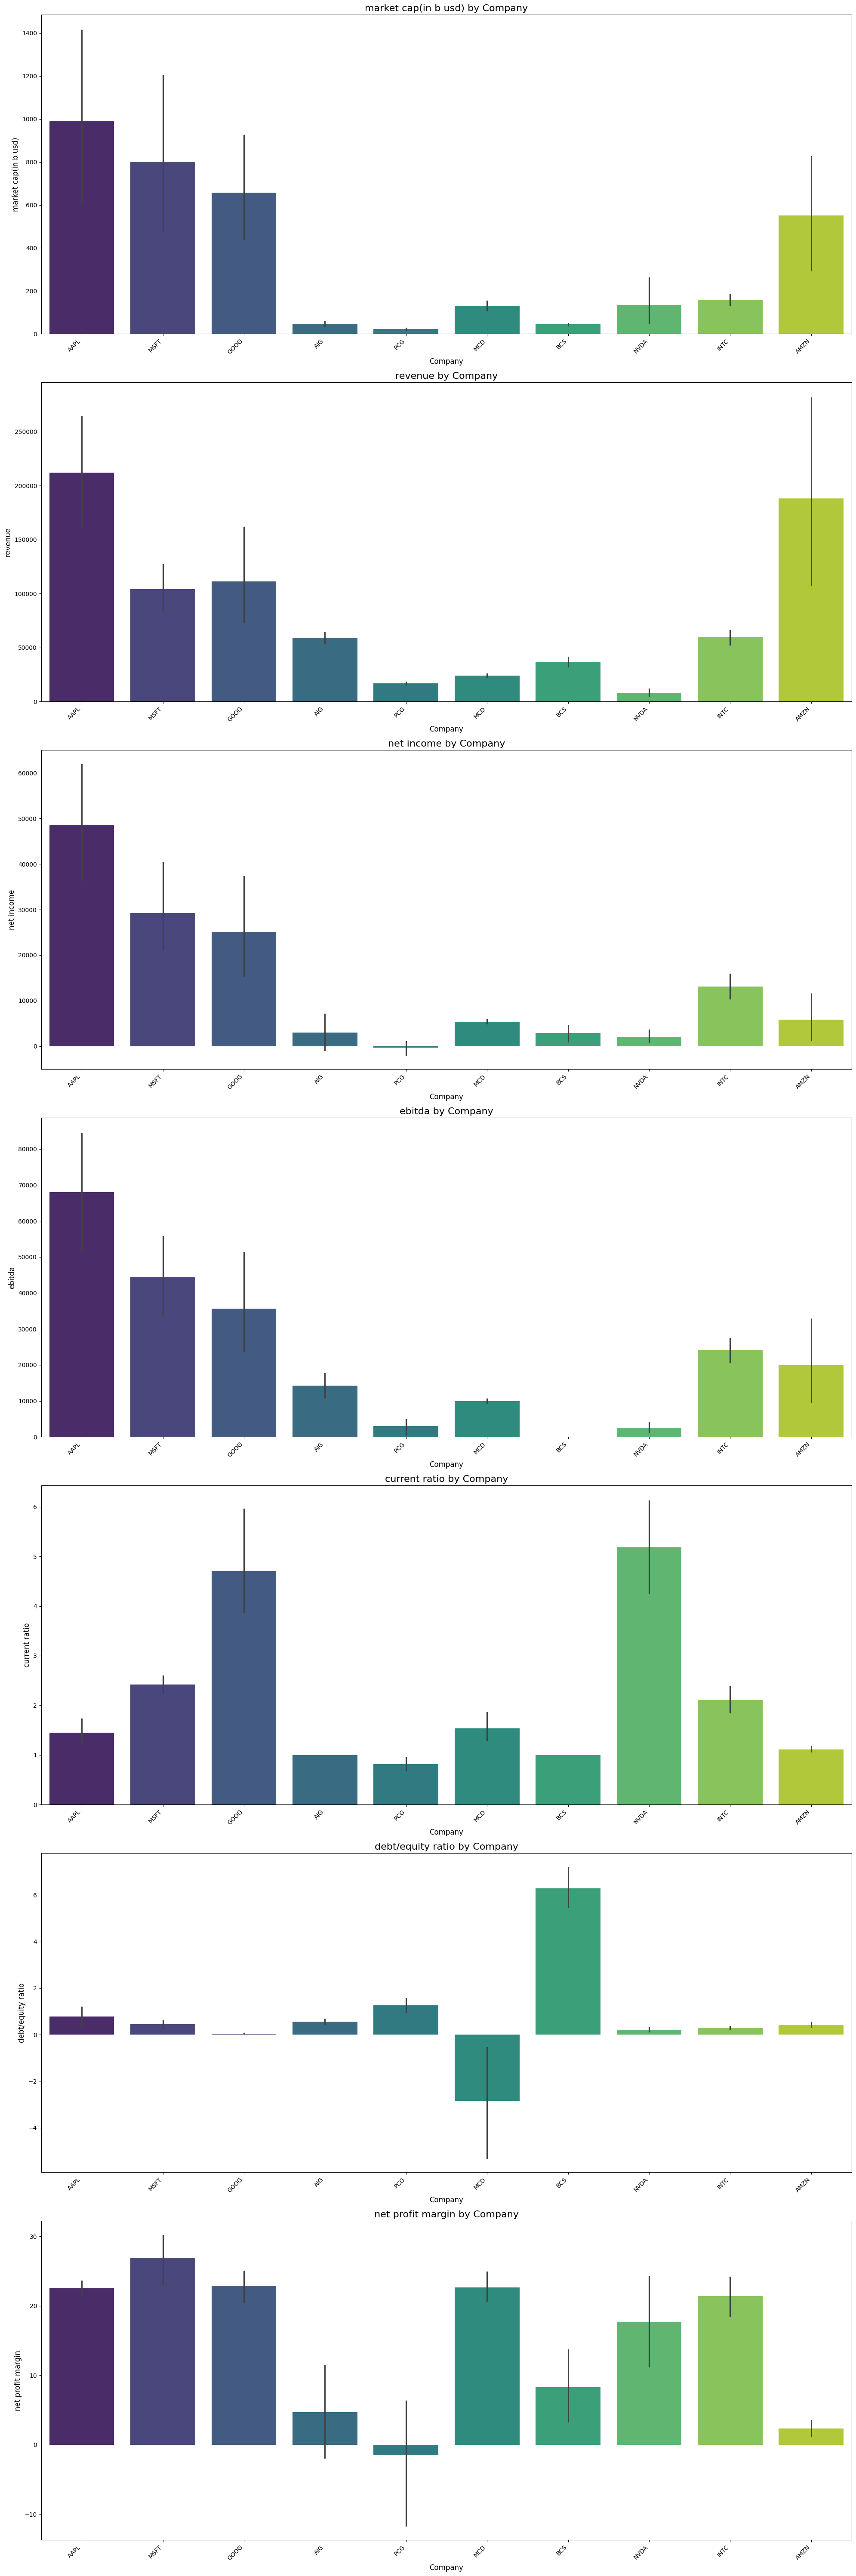

In [12]:
# Define the metrics to visualize
metrics_to_visualize = [
    'market cap(in b usd)', 
    'revenue', 
    'net income', 
    'ebitda', 
    'current ratio', 
    'debt/equity ratio', 
    'net profit margin'
]

# Create a figure for subplots
plt.figure(figsize=(20,60))

# Loop through each metric to create visualizations
for i, metric in enumerate(metrics_to_visualize, 1):
    plt.subplot(len(metrics_to_visualize), 1, i)
    
    # Create a bar plot for each metric
    sns.barplot(x='company', y=metric, data=fs, palette='viridis')
    
    # Adding titles and labels
    plt.title(f'{metric} by Company', fontsize=16)
    plt.xlabel('Company', fontsize=12)
    plt.ylabel(metric, fontsize=12)
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

### Step 3: Financial Ratio Analysis

#### Trend Analysis for Each Company

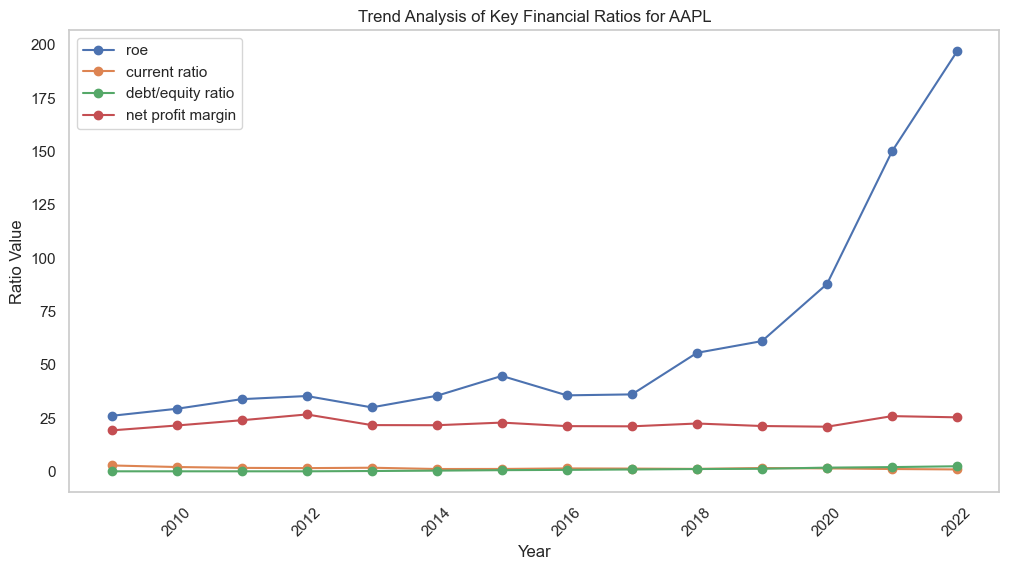

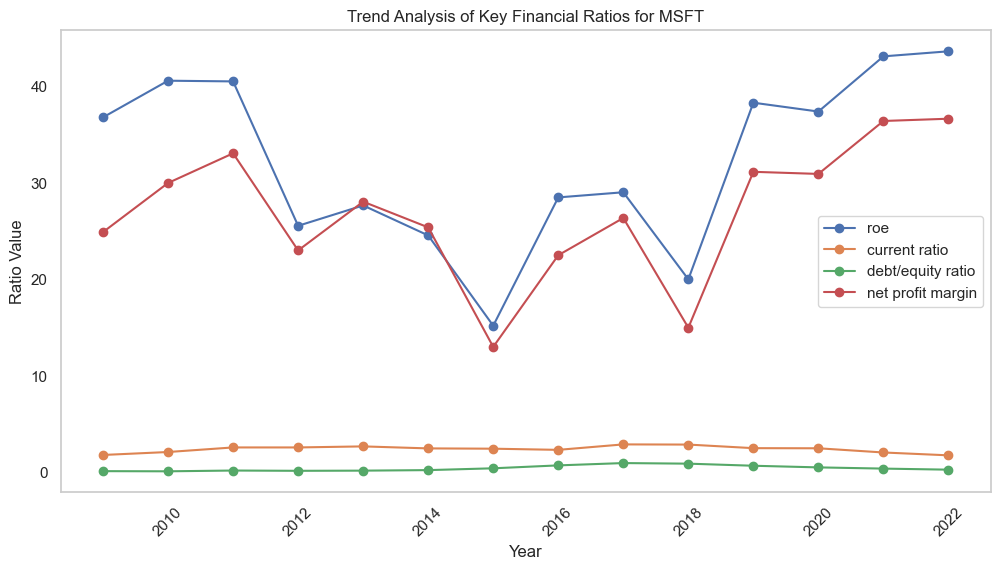

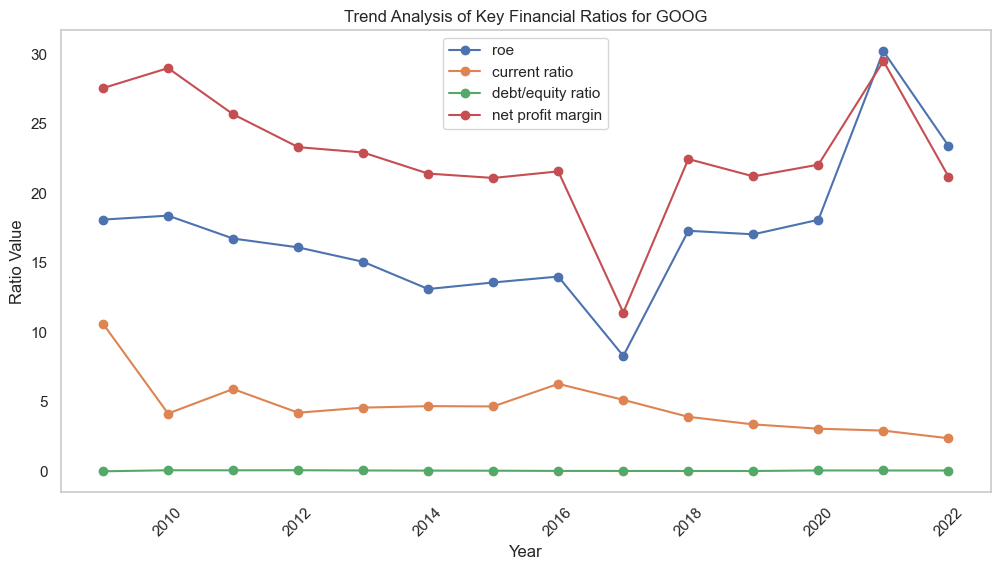

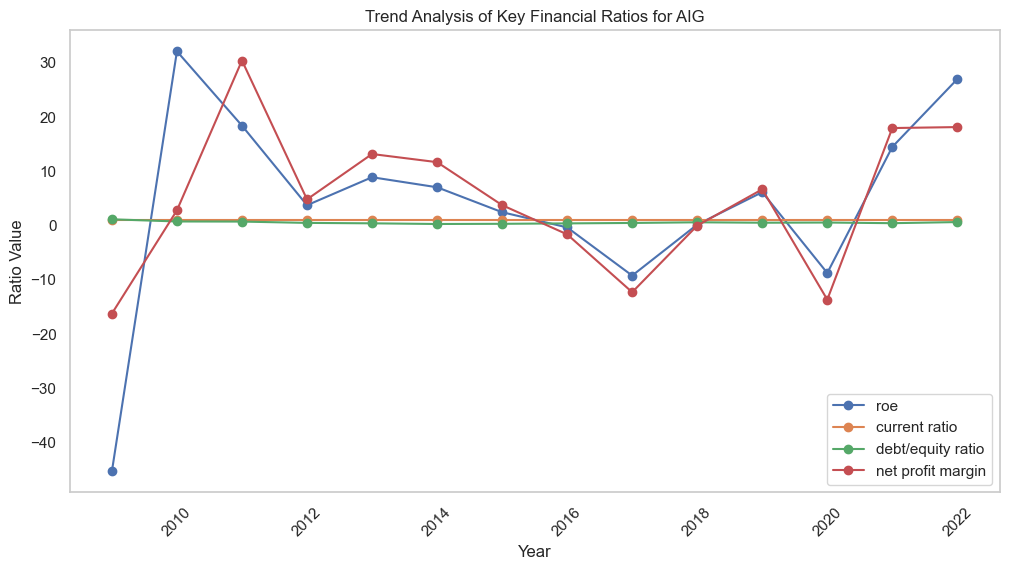

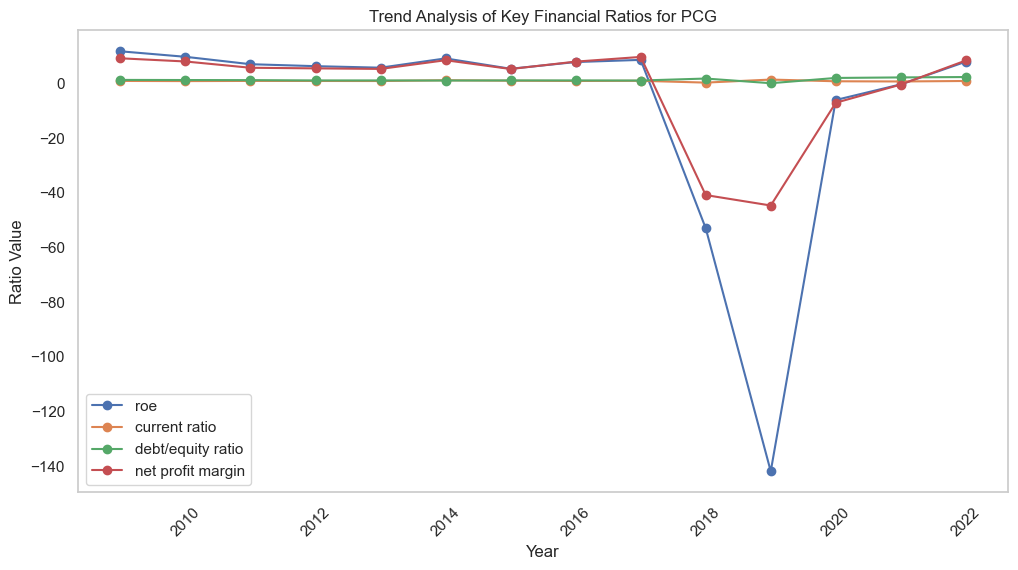

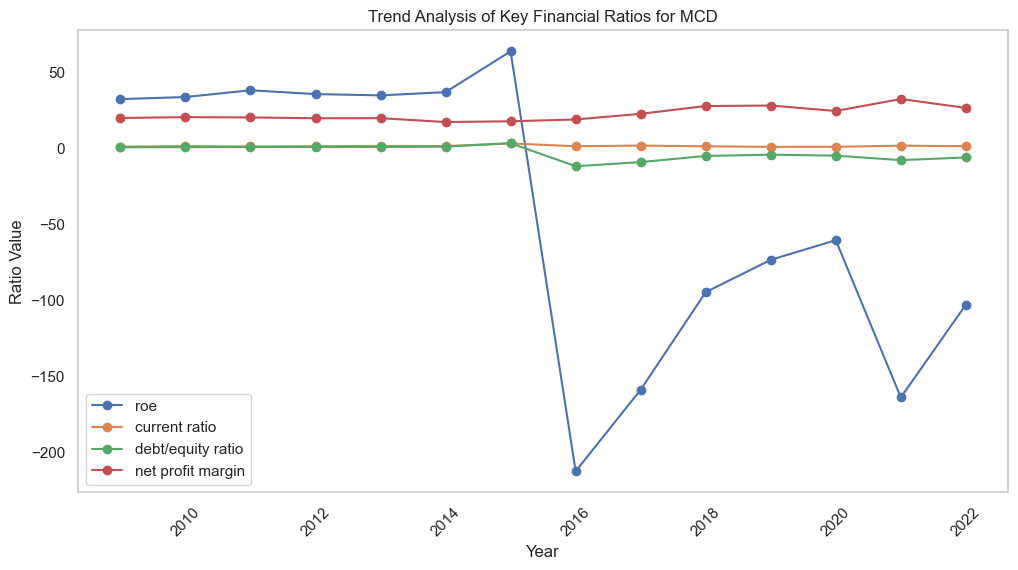

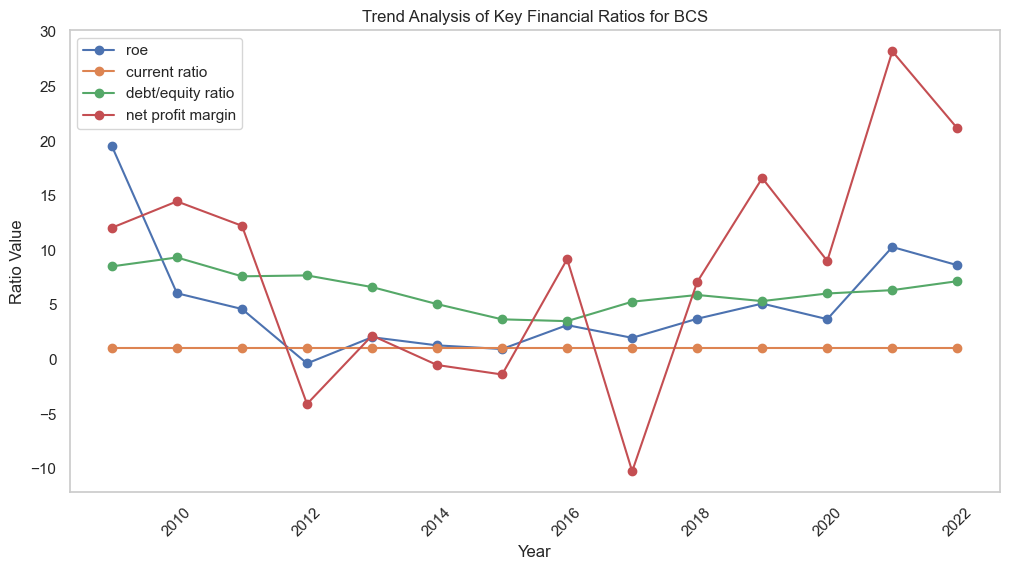

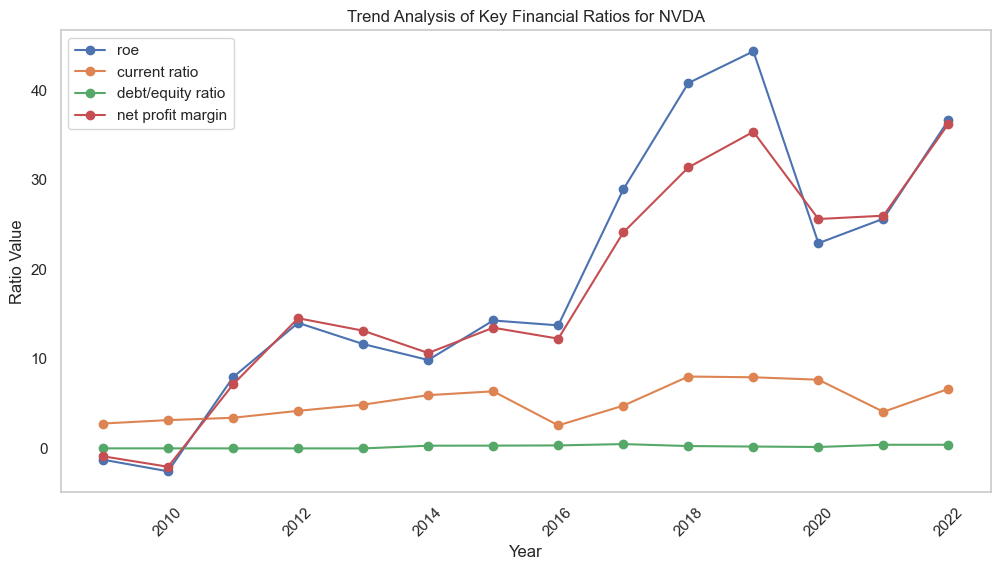

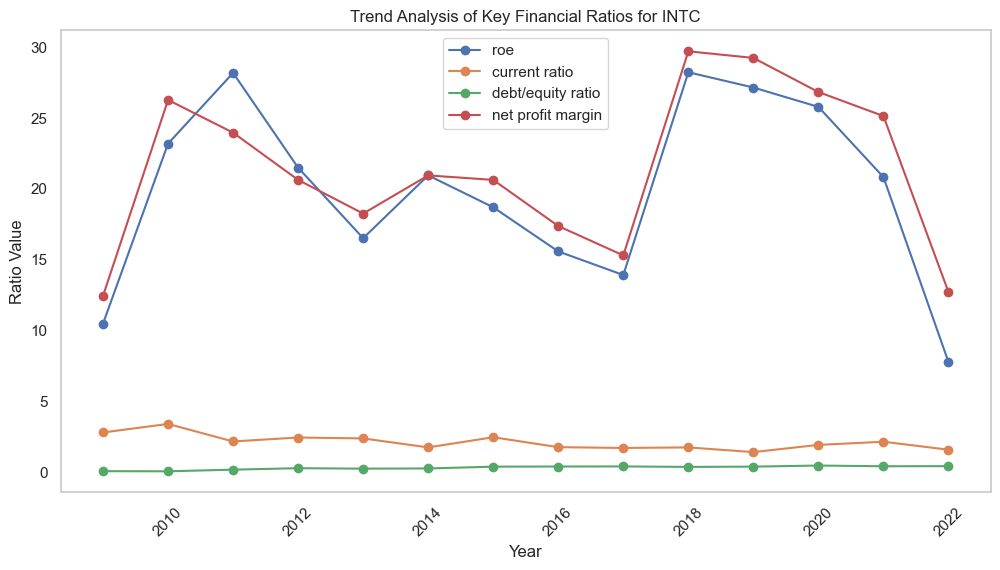

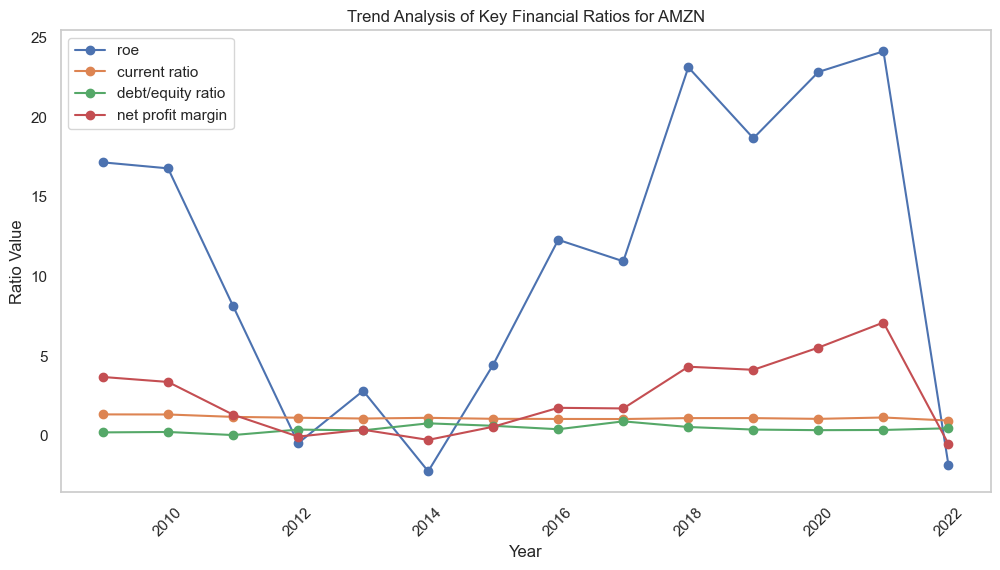

In [13]:
# List of key ratios for trend analysis
key_ratios = ['roe', 'current ratio', 'debt/equity ratio', 'net profit margin']

# Set the plot style
sns.set(style='whitegrid')

# Unique companies in the dataset
companies = fs['company'].unique()

# Create a figure for each company
for company in companies:
    company_data = fs[fs['company'] == company]

    plt.figure(figsize=(12, 6))
    for ratio in key_ratios:
        plt.plot(company_data.groupby('year')[ratio].mean(), marker='o', label=ratio)

    plt.title(f'Trend Analysis of Key Financial Ratios for {company}')
    plt.xlabel('Year')
    plt.ylabel('Ratio Value')
    plt.legend()
    plt.xticks(rotation=45)
    plt.grid()
    plt.show()

#### Peer Comparison

In [14]:
# Calculate average financial ratios by category
peer_comparison = fs.groupby('category')[key_ratios].mean().reset_index()

In [15]:
# Display the results
peer_comparison

category        roe  current ratio  debt/equity ratio  \
0           BANK   4.556204       1.000000           3.423086   
1           ELEC  19.489589       3.643114           0.252579   
2           FOOD -42.205129       1.537429          -2.835779   
3             IT  36.873331       2.862362           0.420707   
4           LOGI  11.197943       1.114400           0.422207   
5  MANUFACTURING  -8.768300       0.817836           1.250129   

   net profit margin  
0           6.488179  
1          19.514307  
2          22.672486  
3          24.114221  
4           2.353793  
5          -1.463186

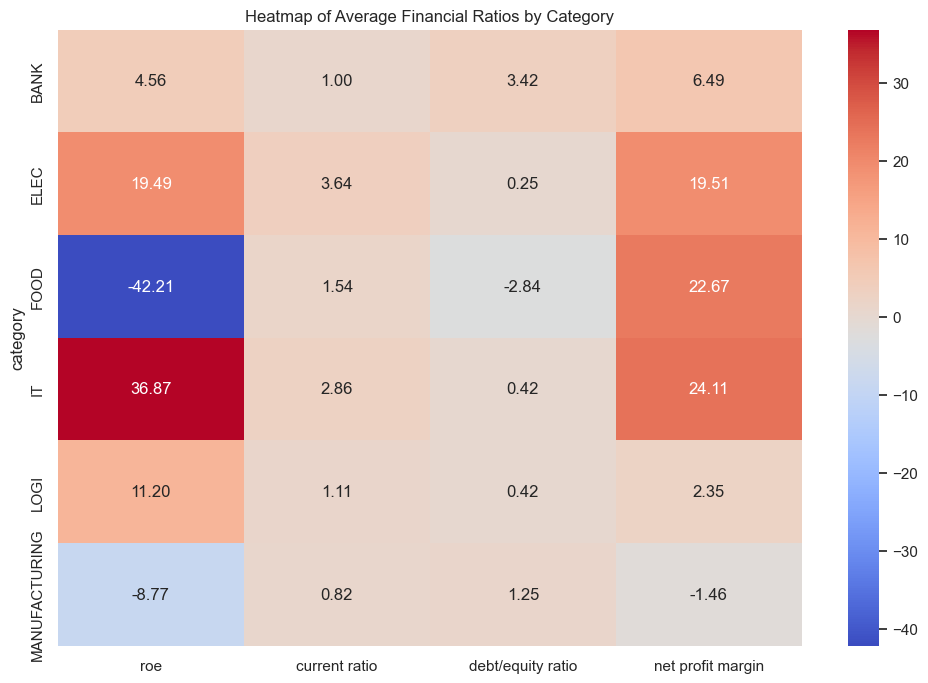

In [16]:
# Visualize key financial ratios with a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(peer_comparison.set_index('category')[key_ratios], annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap of Average Financial Ratios by Category')
plt.show()

### Step 4: Cash Flow Analysis

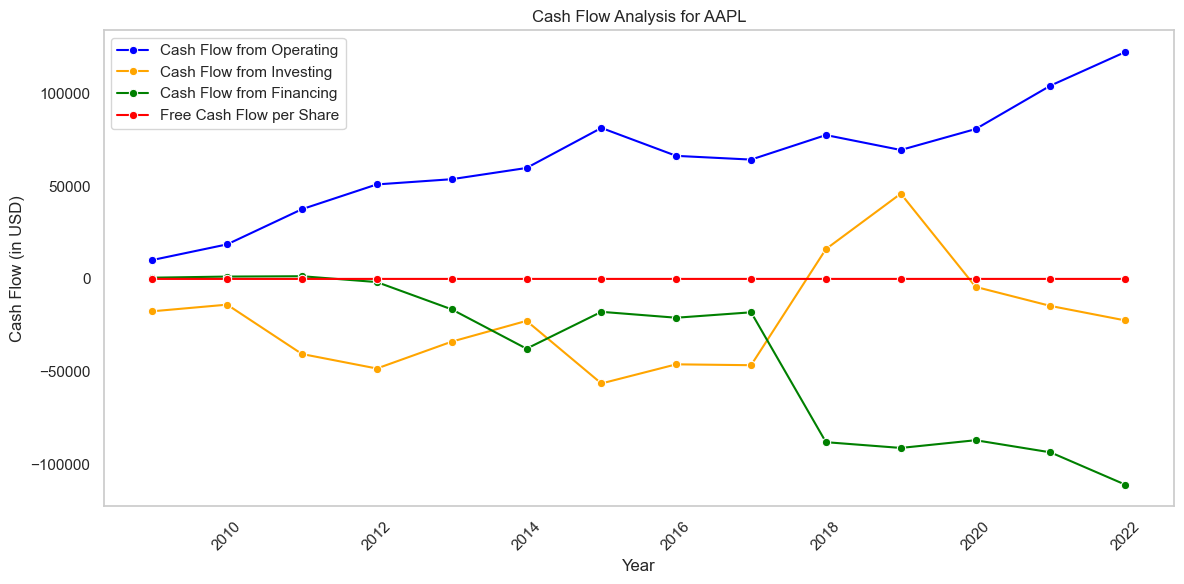

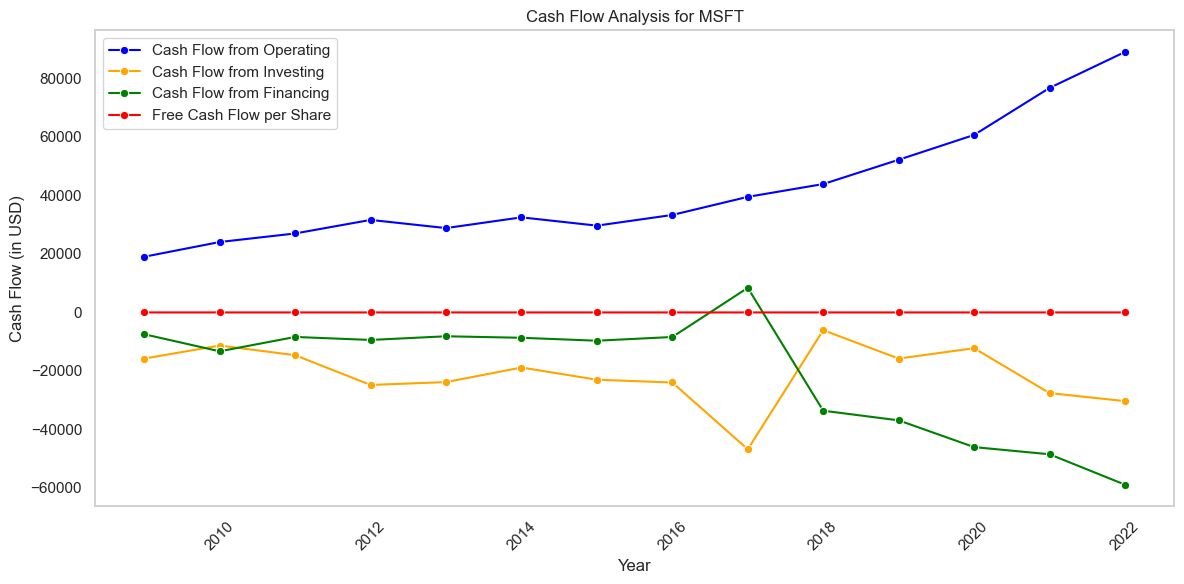

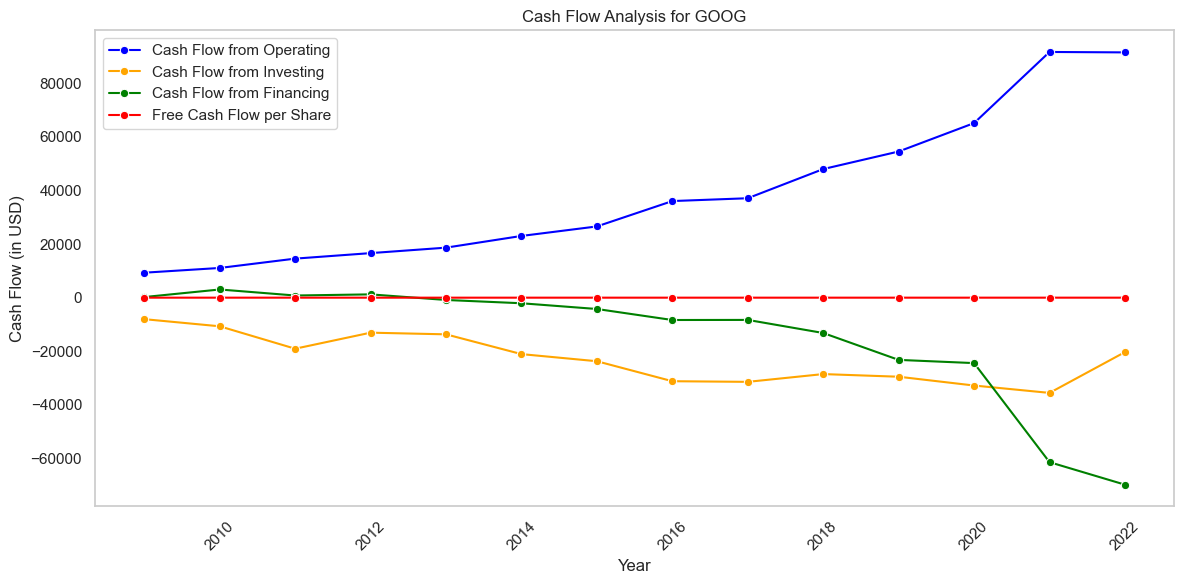

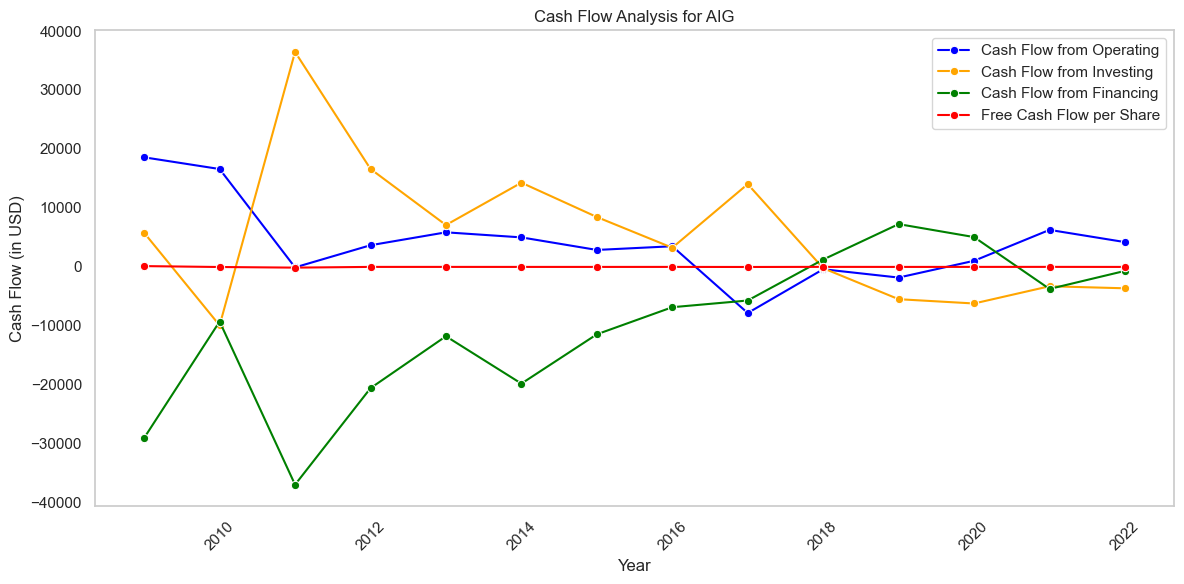

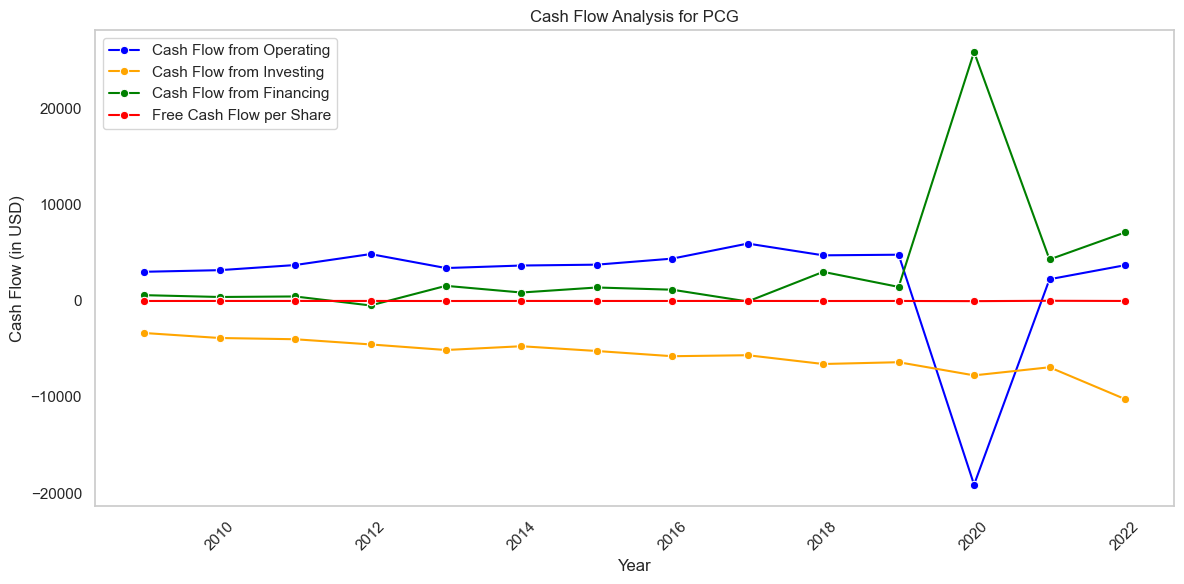

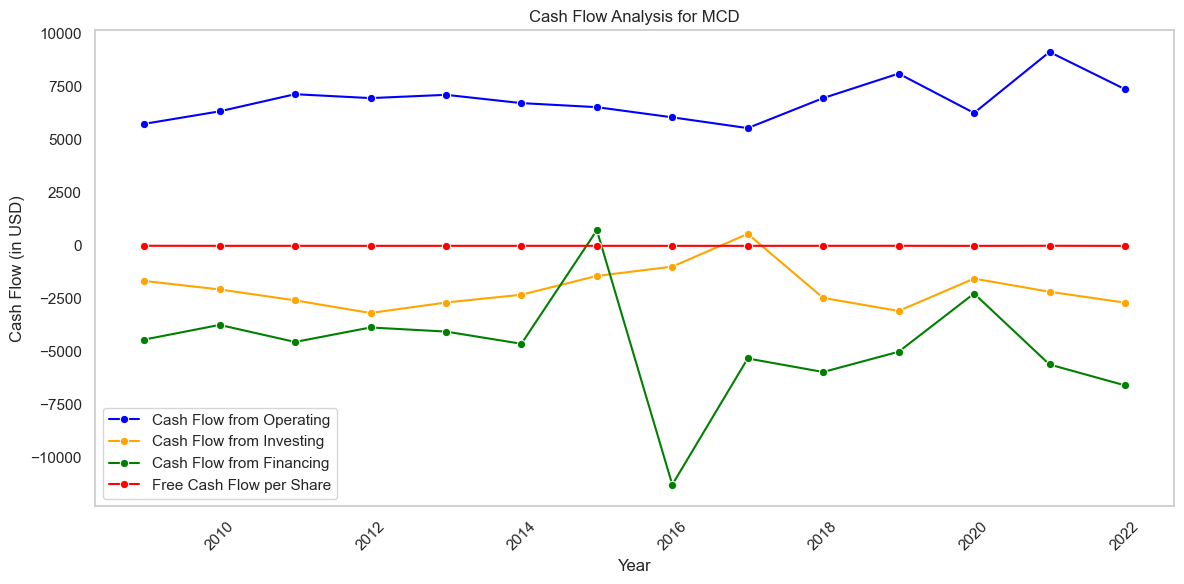

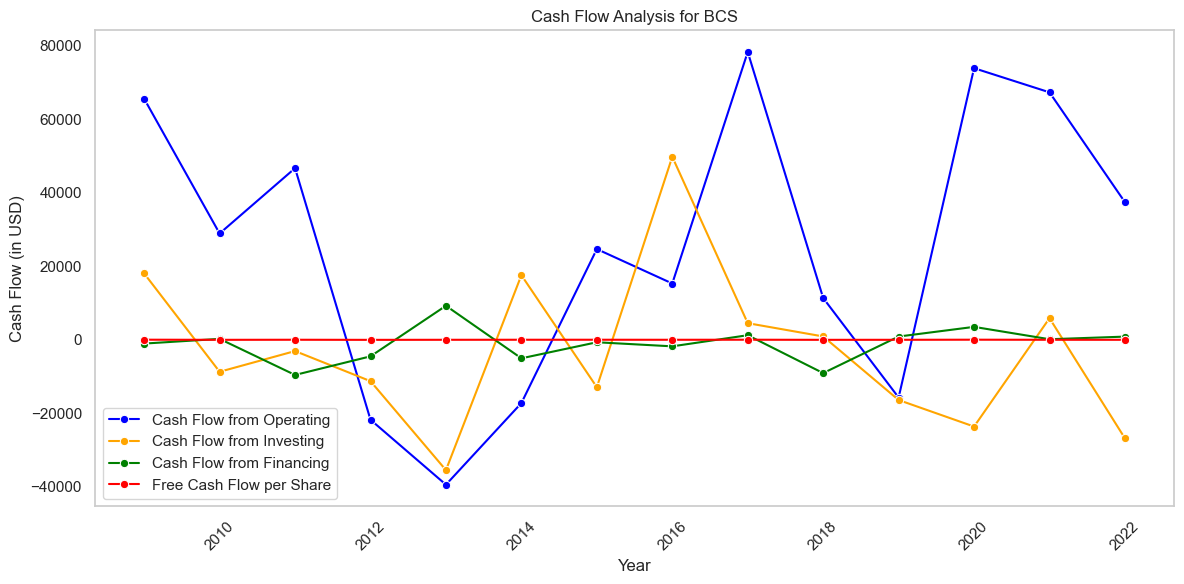

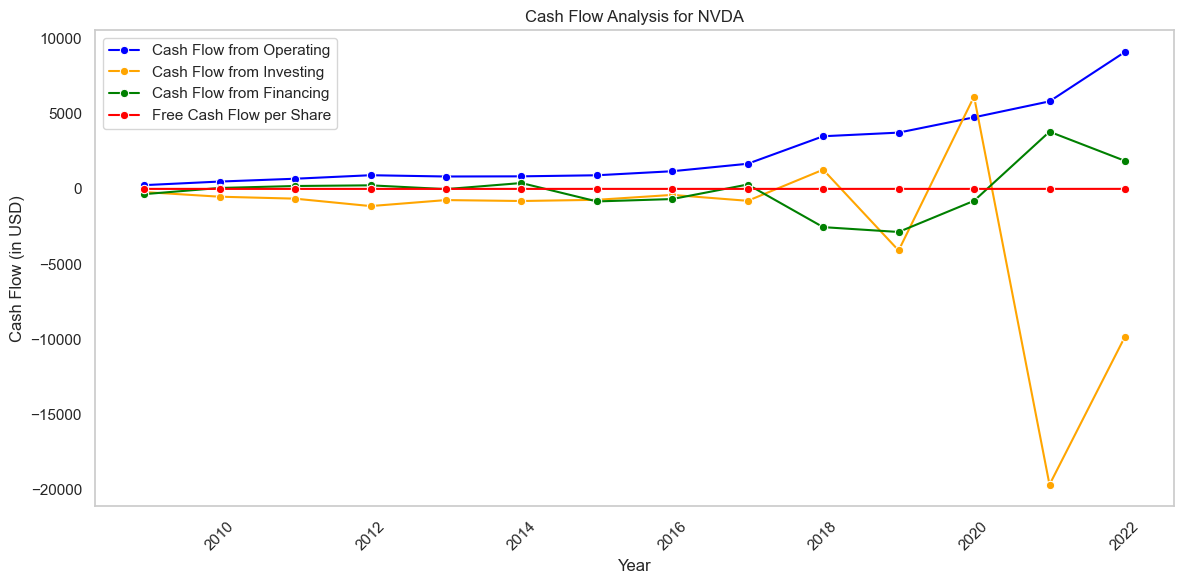

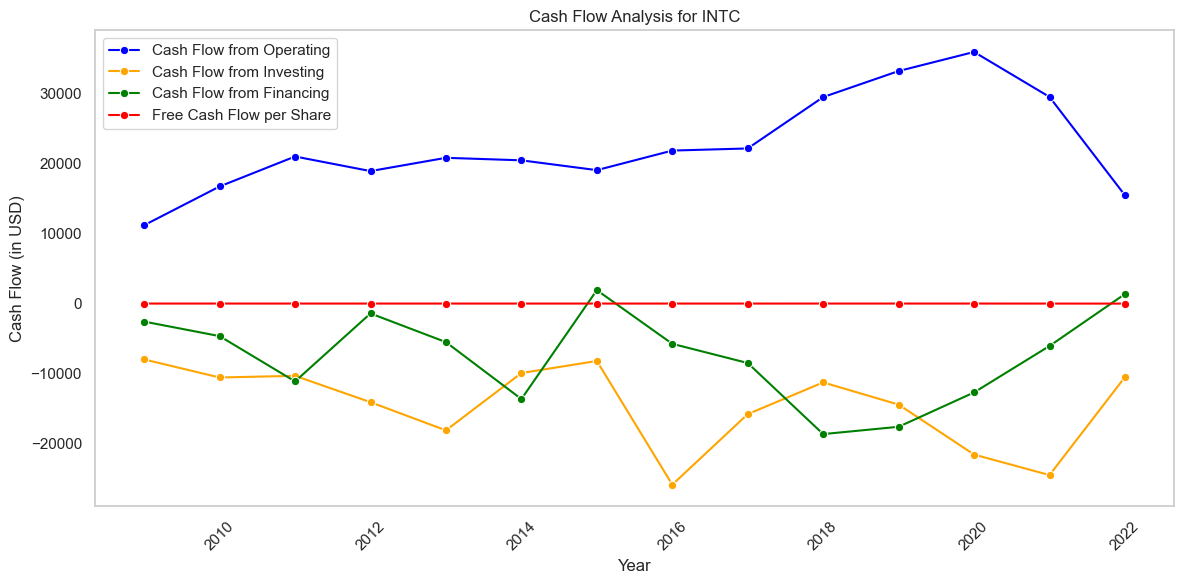

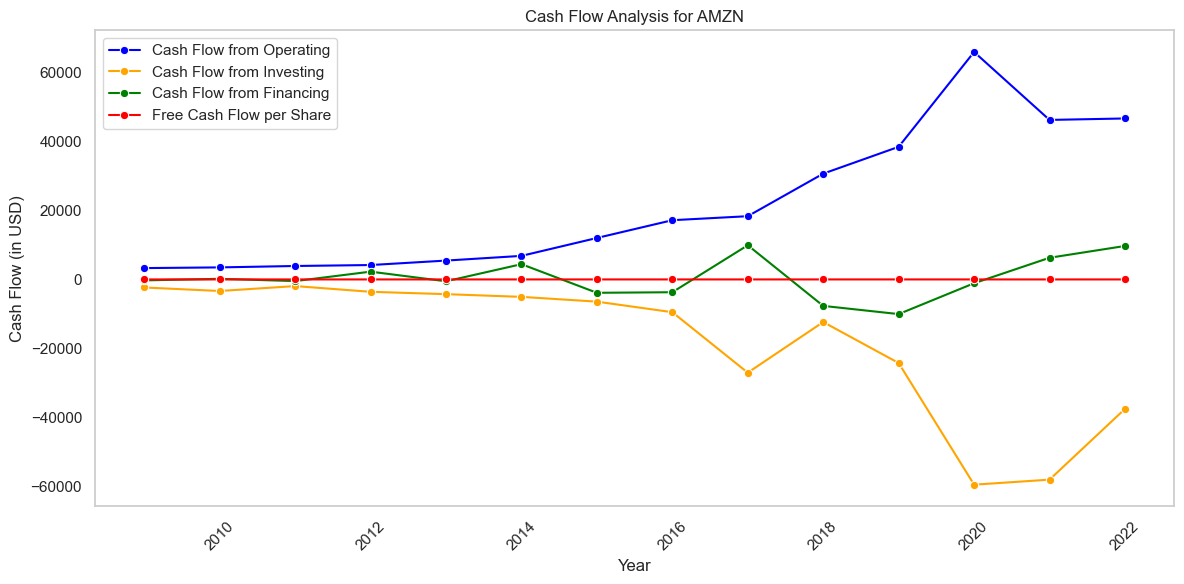

In [17]:
for company in companies:
    company_data = fs[fs['company'] == company]

    plt.figure(figsize=(12, 6))
    
    # Plot Cash Flow from Operating Activities
    sns.lineplot(data=company_data, x='year', y='cash flow from operating', marker='o', label='Cash Flow from Operating', color='blue')
    
    # Plot Cash Flow from Investing Activities
    sns.lineplot(data=company_data, x='year', y='cash flow from investing', marker='o', label='Cash Flow from Investing', color='orange')
    
    # Plot Cash Flow from Financing Activities
    sns.lineplot(data=company_data, x='year', y='cash flow from financial activities', marker='o', label='Cash Flow from Financing', color='green')
    
    # Plot Free Cash Flow per Share
    sns.lineplot(data=company_data, x='year', y='free cash flow per share', marker='o', label='Free Cash Flow per Share', color='red')
    
    # Customize the plot
    plt.title(f'Cash Flow Analysis for {company}')
    plt.ylabel('Cash Flow (in USD)')
    plt.xlabel('Year')
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid()
    
    plt.tight_layout()
    plt.show()

### Step 5: Employee and Inflation Impact

#### Visualize the Impact of Number of Employees

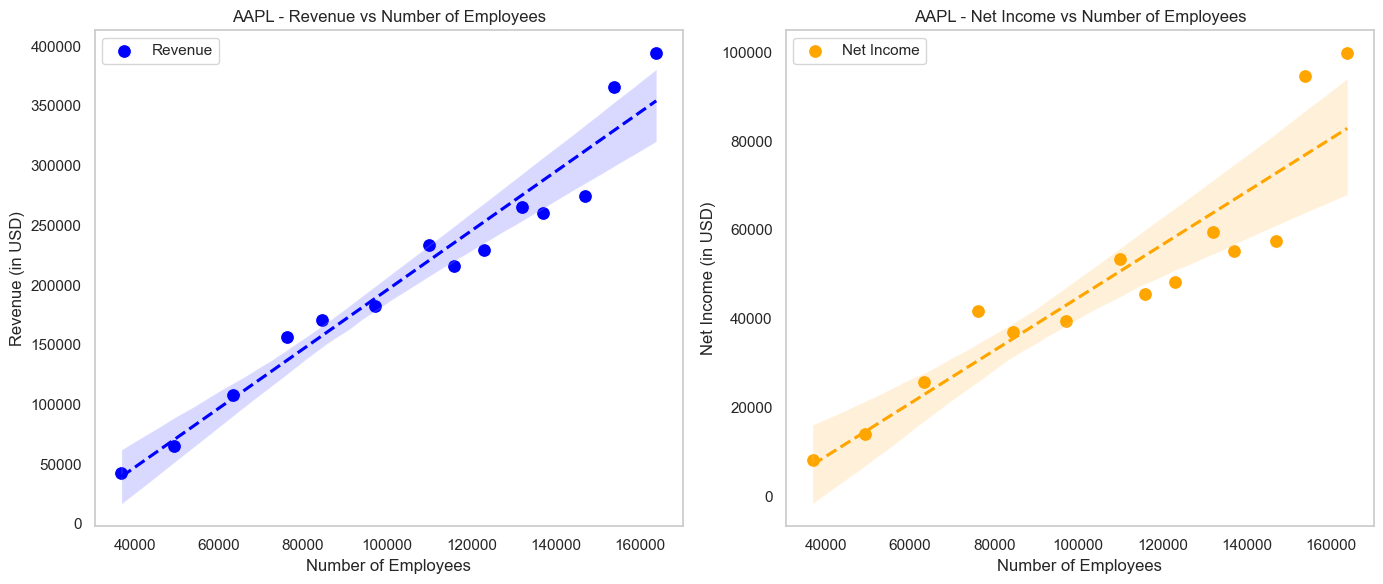

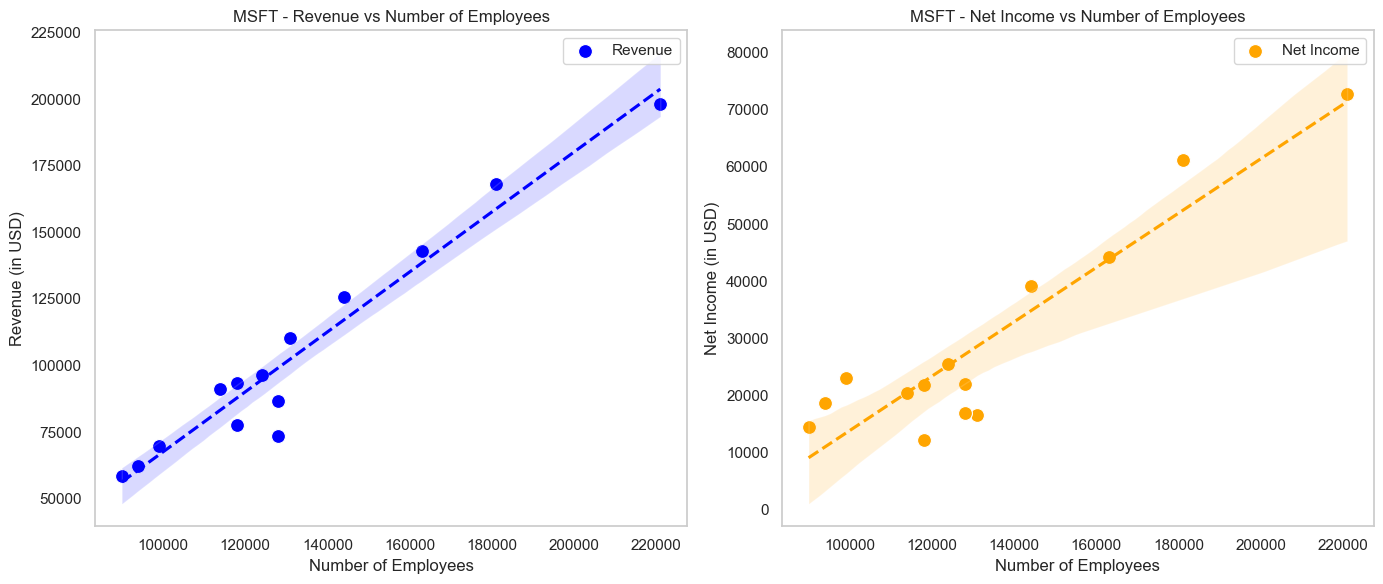

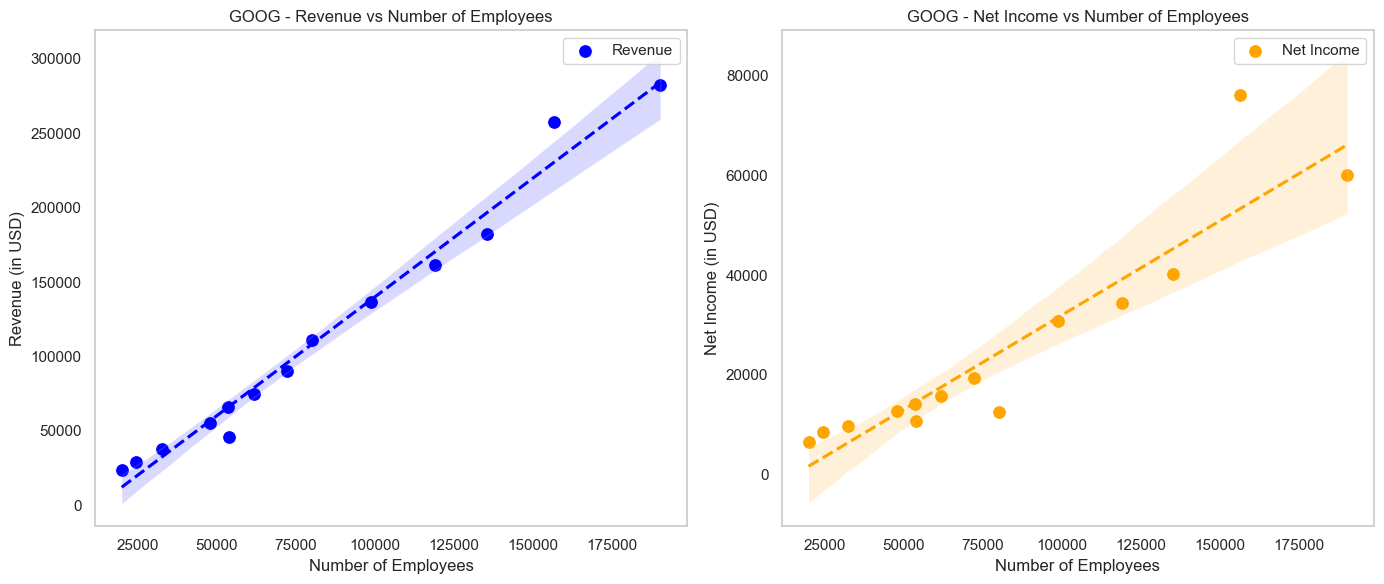

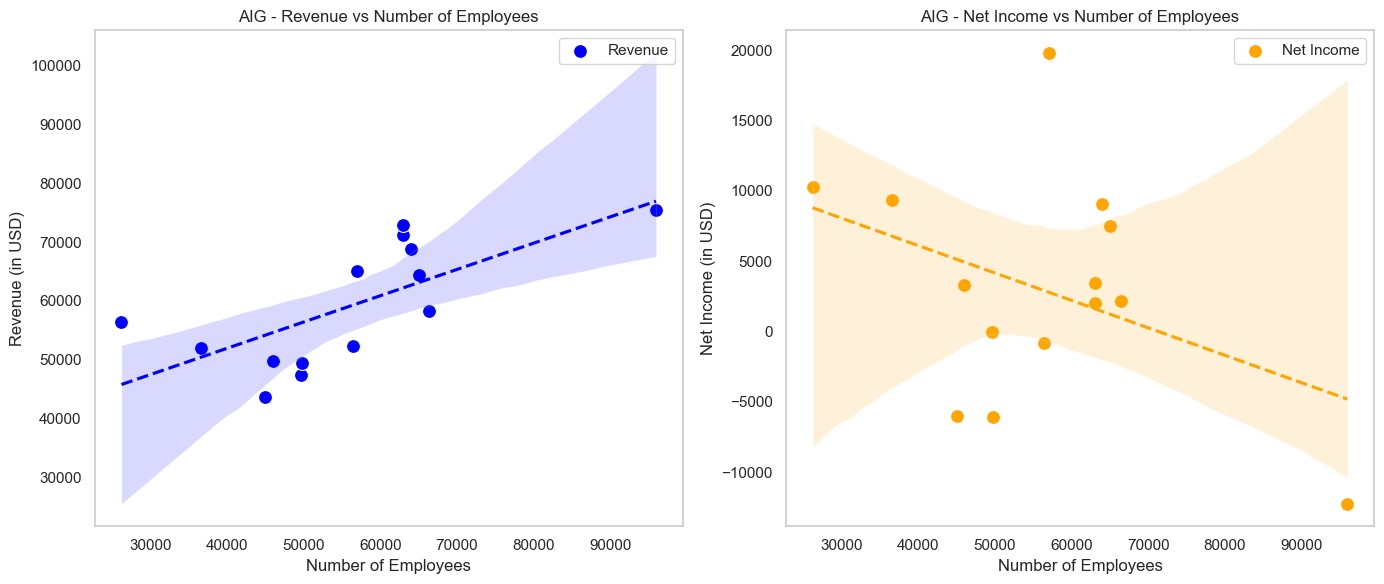

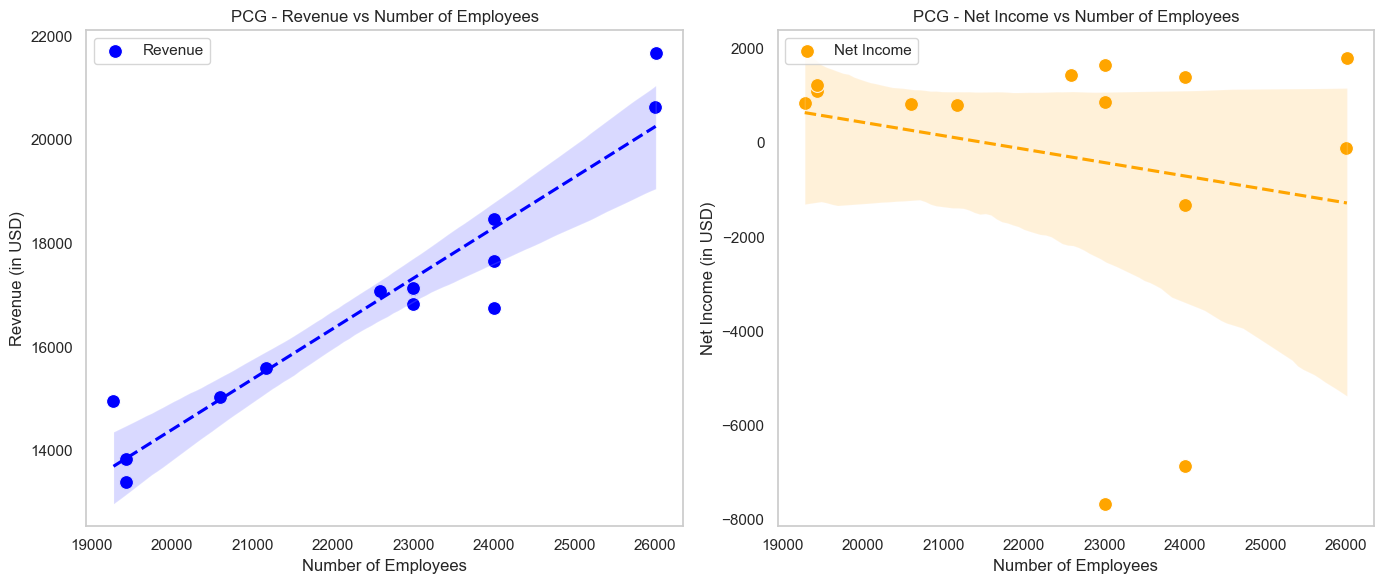

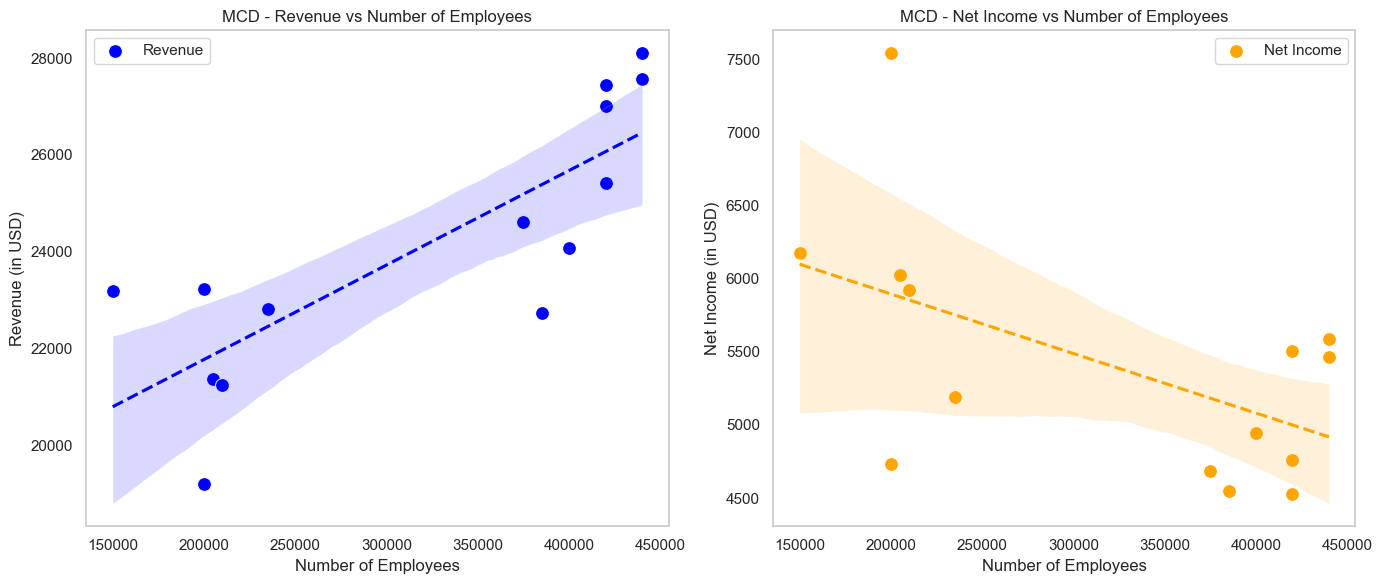

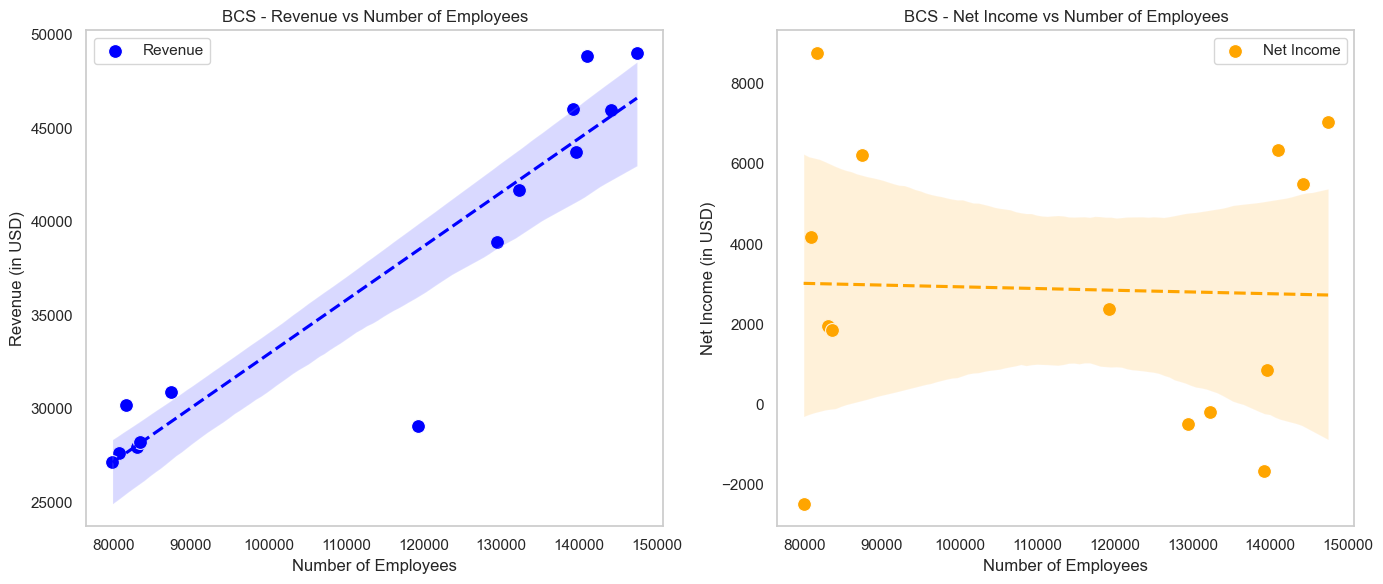

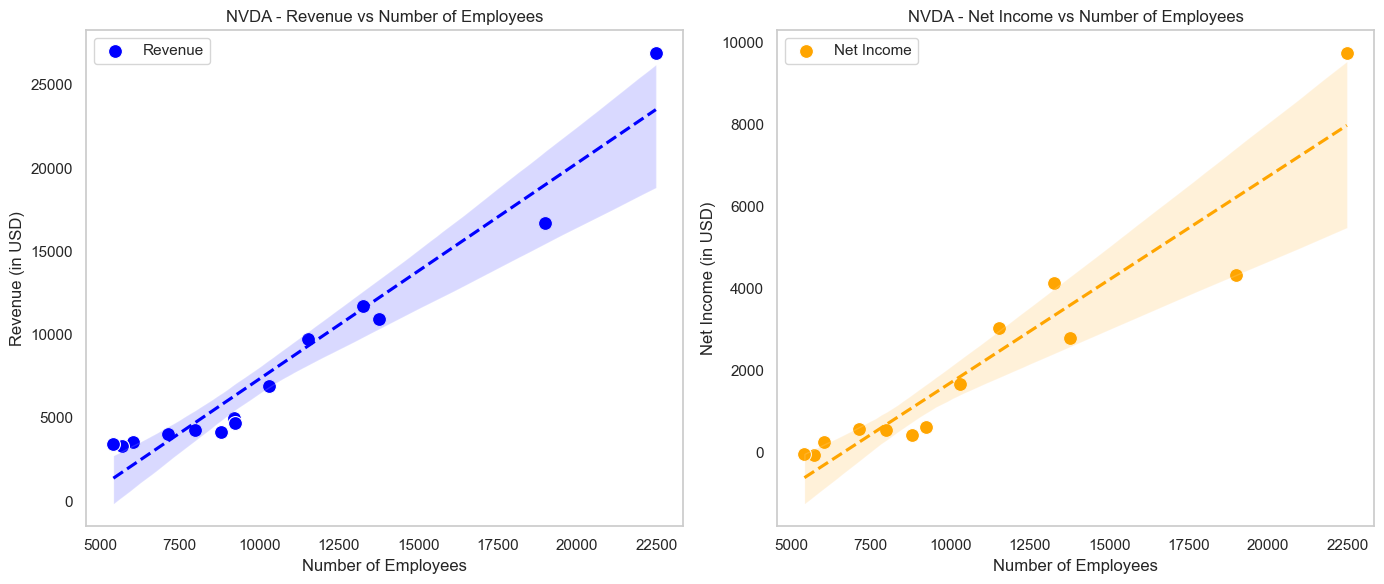

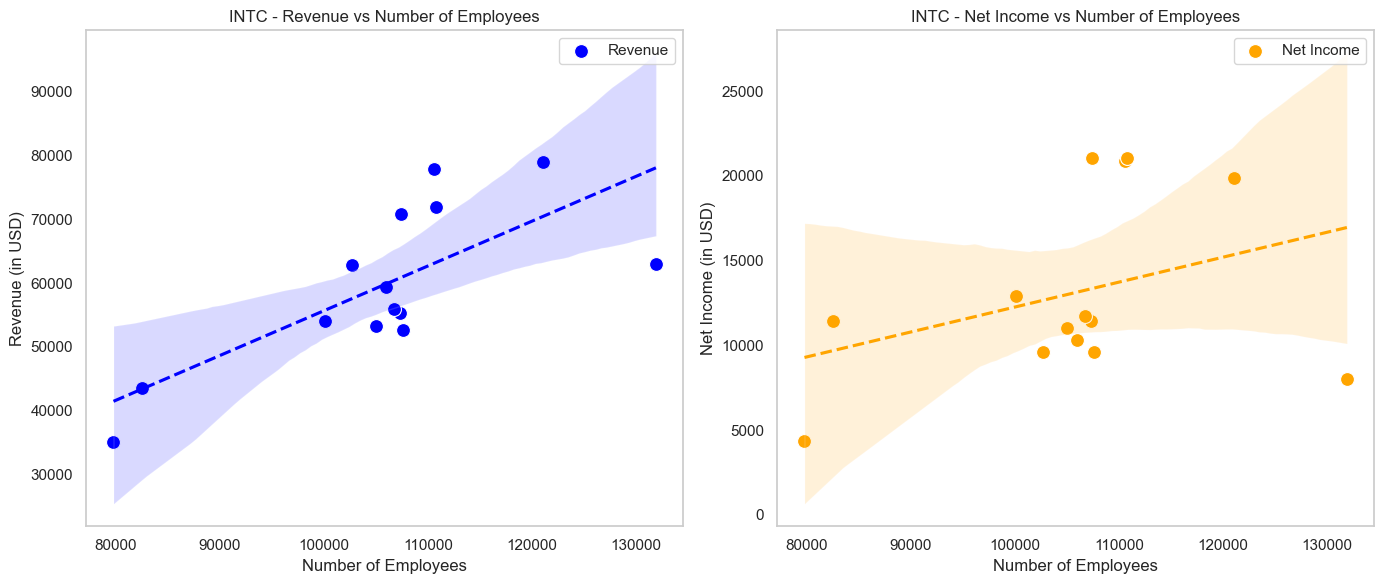

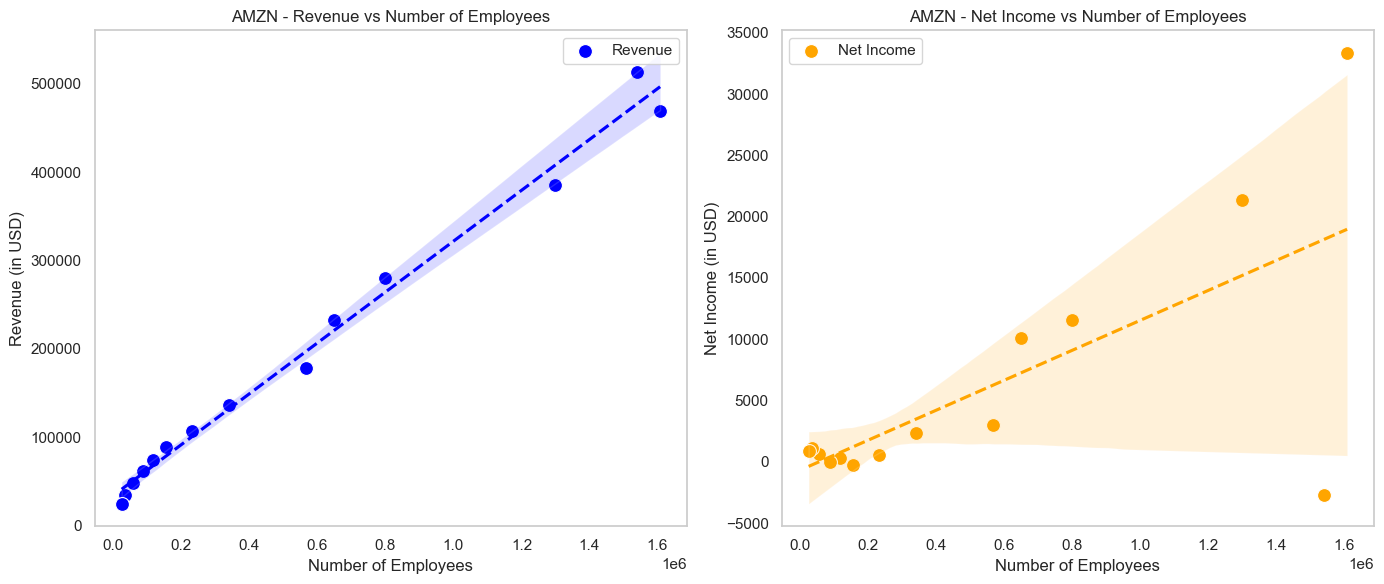

In [18]:
# Let's visualize the impact of the number of employees on revenue and net income
for company in companies:
    company_data = fs[fs['company'] == company]

    plt.figure(figsize=(14, 6))

    # Revenue vs Number of Employees
    plt.subplot(1, 2, 1)
    sns.scatterplot(data=company_data, x='number of employees', y='revenue', color='blue', s=100, label='Revenue')
    sns.regplot(data=company_data, x='number of employees', y='revenue', scatter=False, color='blue', line_kws={'linestyle':'--'})
    plt.title(f'{company} - Revenue vs Number of Employees')
    plt.xlabel('Number of Employees')
    plt.ylabel('Revenue (in USD)')
    plt.grid()
    
    # Net Income vs Number of Employees
    plt.subplot(1, 2, 2)
    sns.scatterplot(data=company_data, x='number of employees', y='net income', color='orange', s=100, label='Net Income')
    sns.regplot(data=company_data, x='number of employees', y='net income', scatter=False, color='orange', line_kws={'linestyle':'--'})
    plt.title(f'{company} - Net Income vs Number of Employees')
    plt.xlabel('Number of Employees')
    plt.ylabel('Net Income (in USD)')
    plt.grid()

    plt.tight_layout()
    plt.show()

#### Visualize the Impact of Inflation

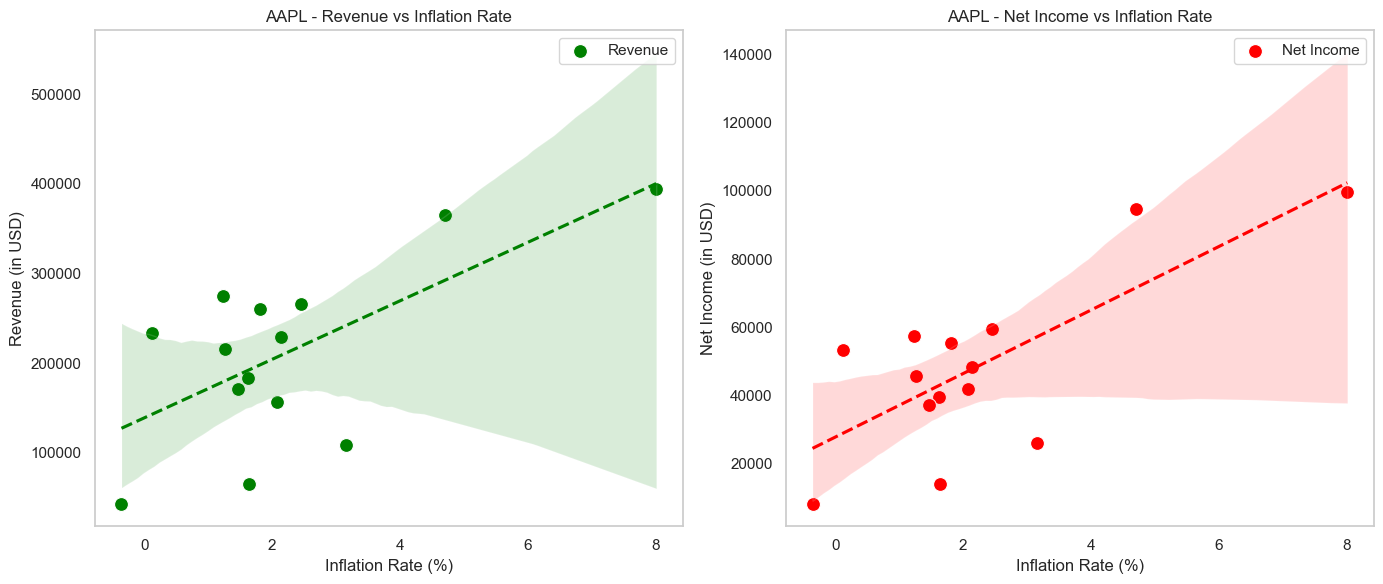

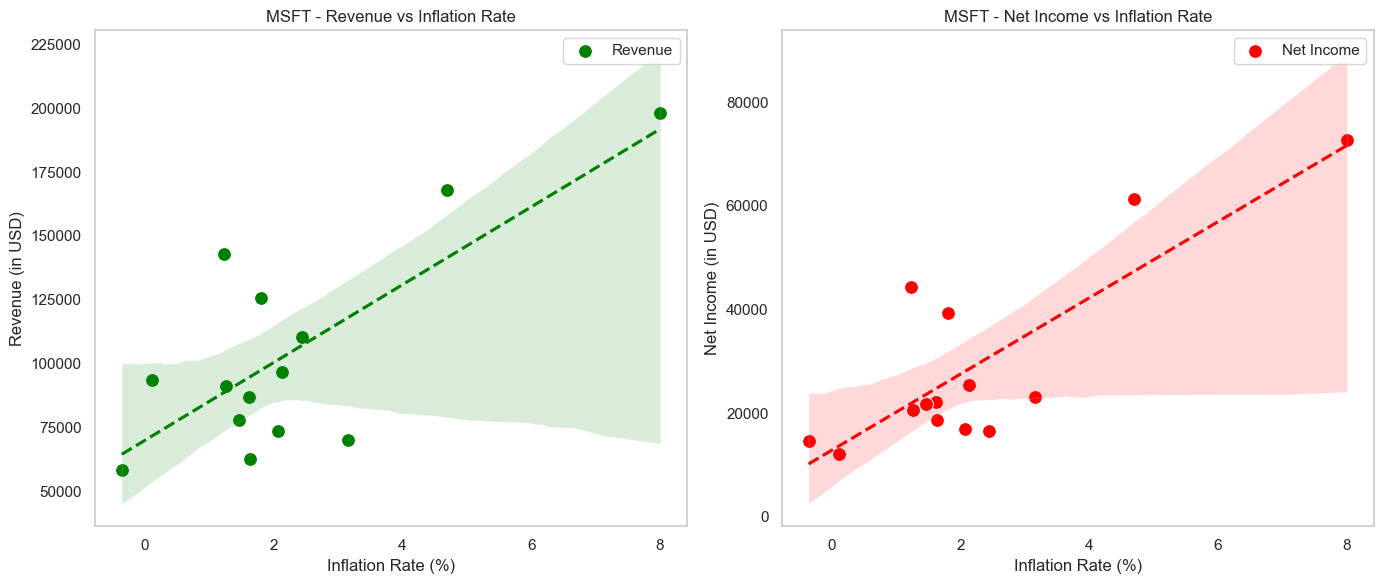

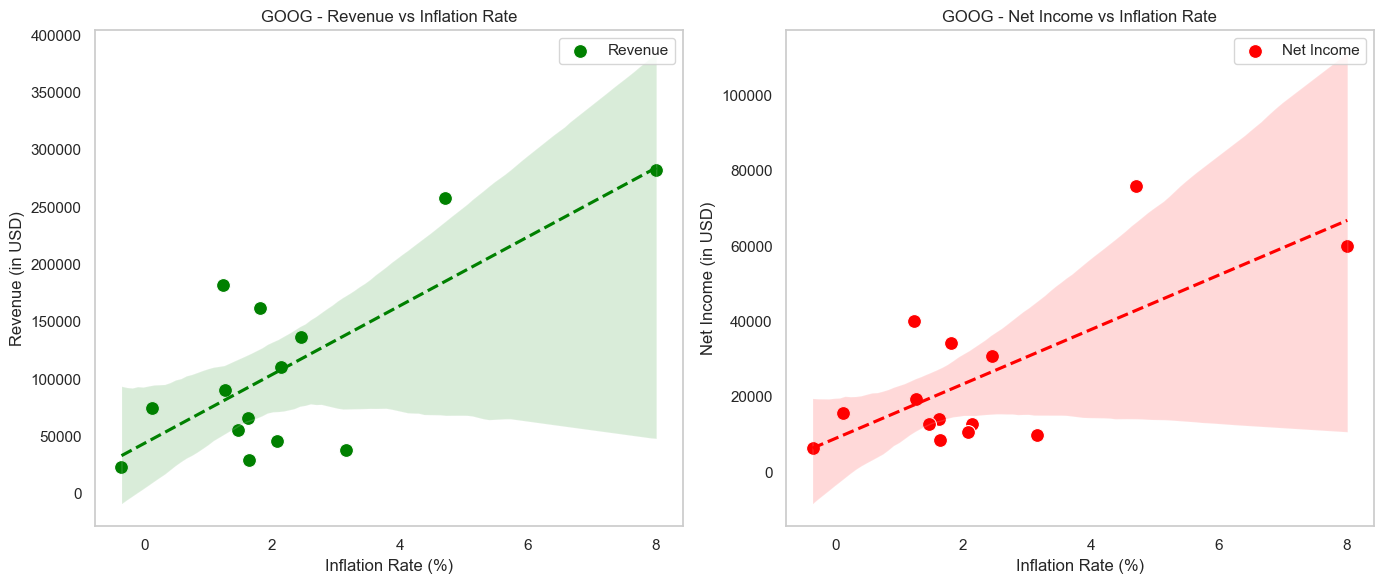

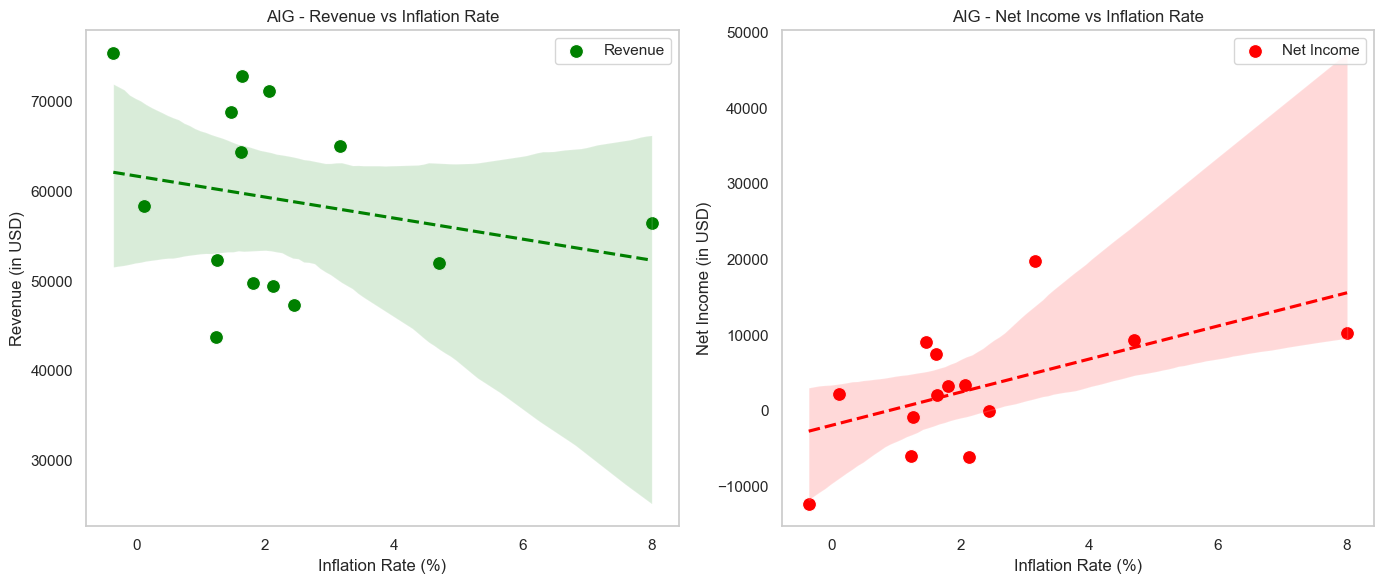

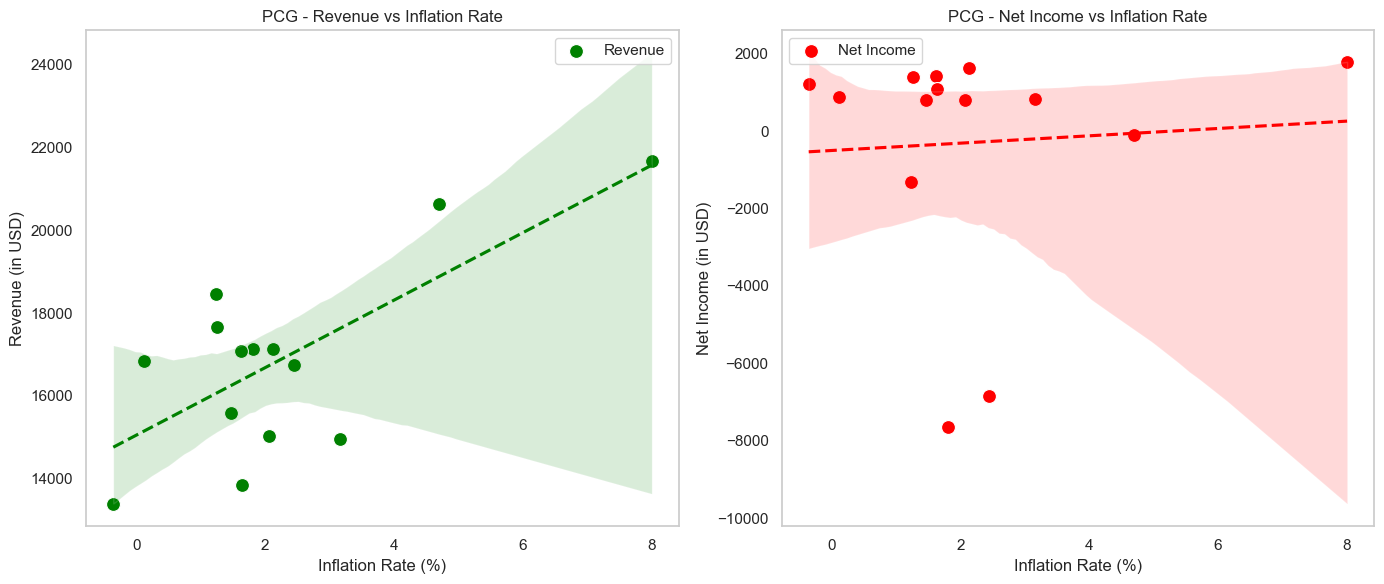

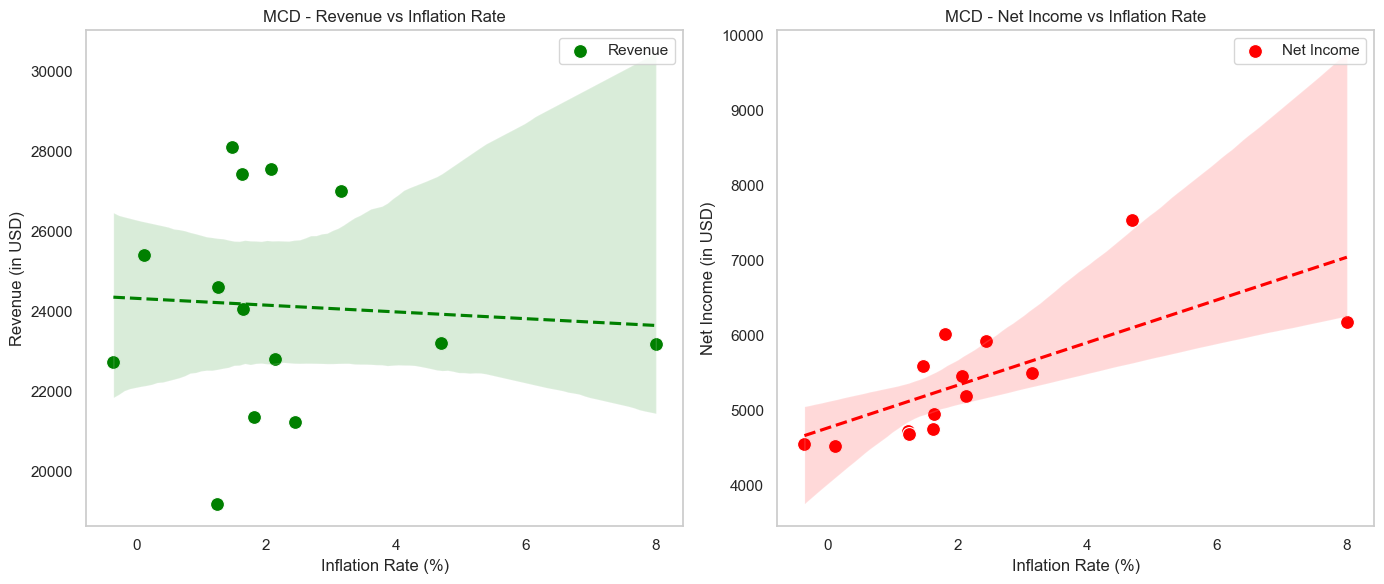

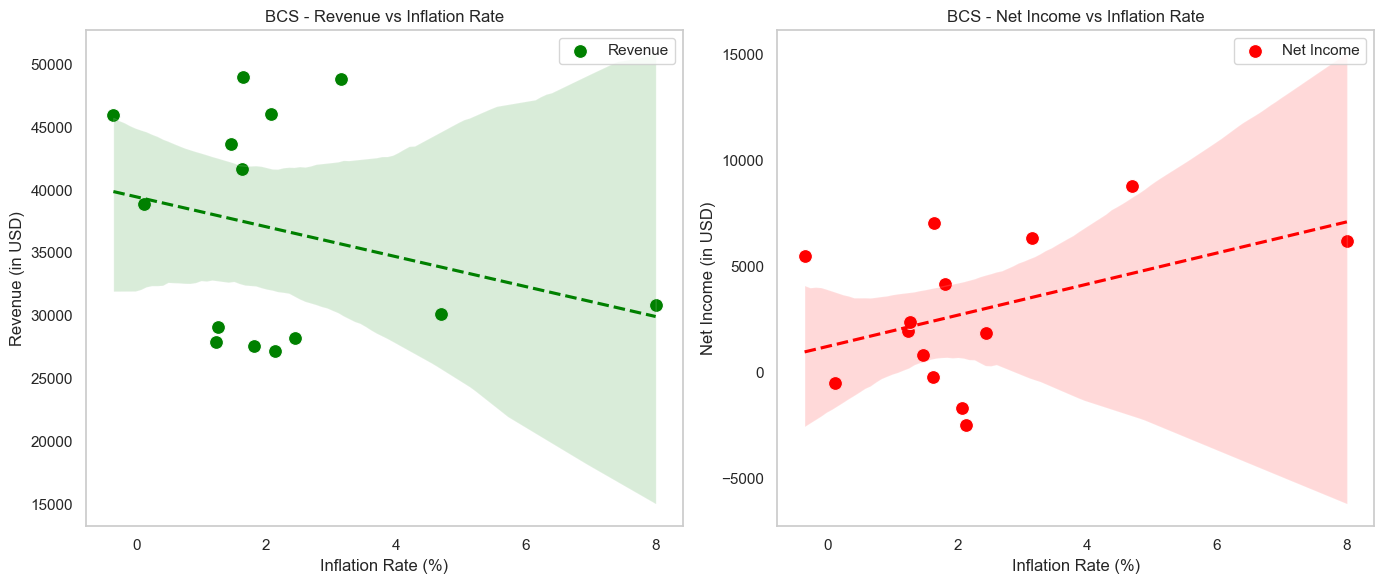

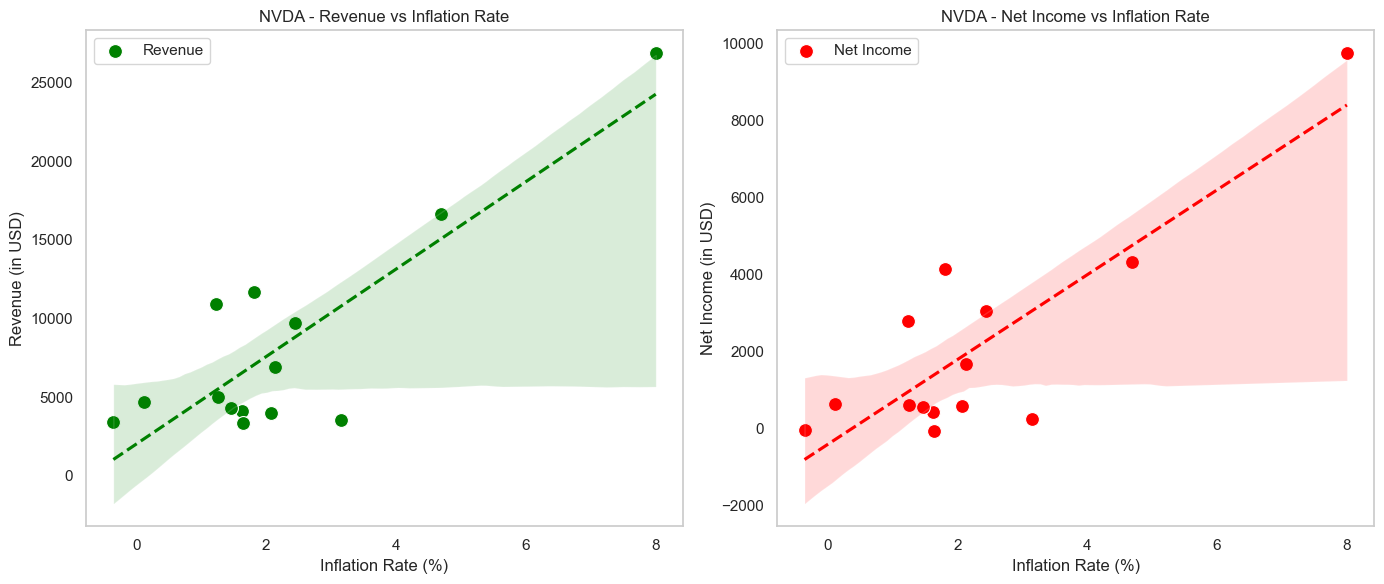

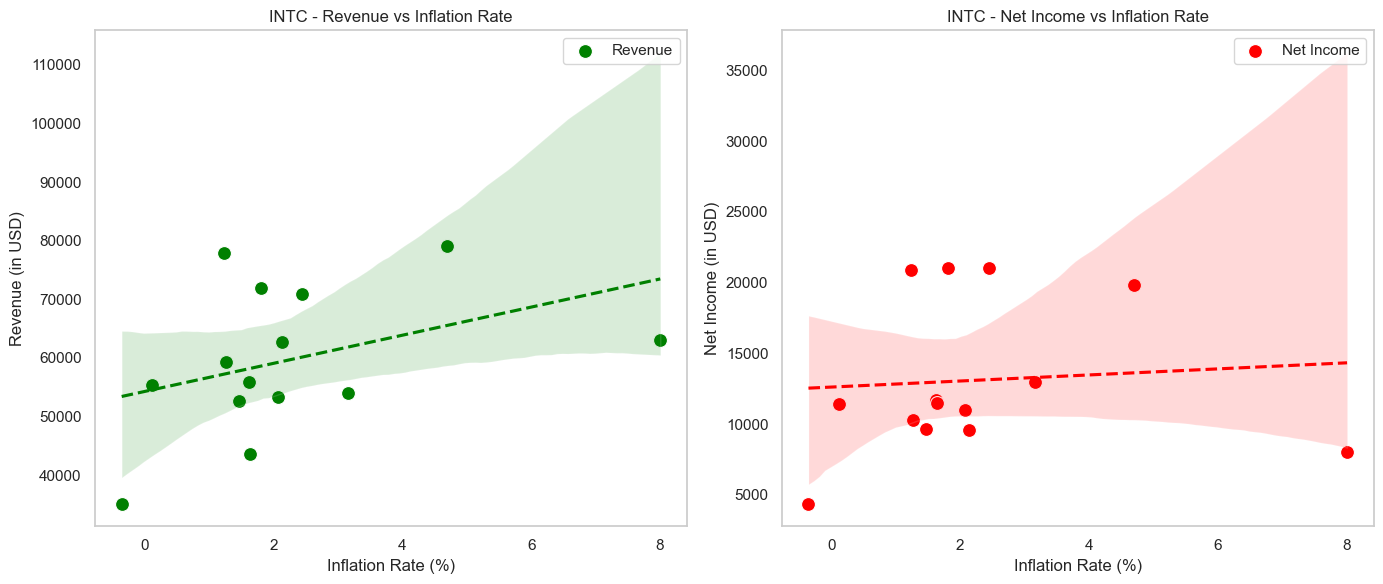

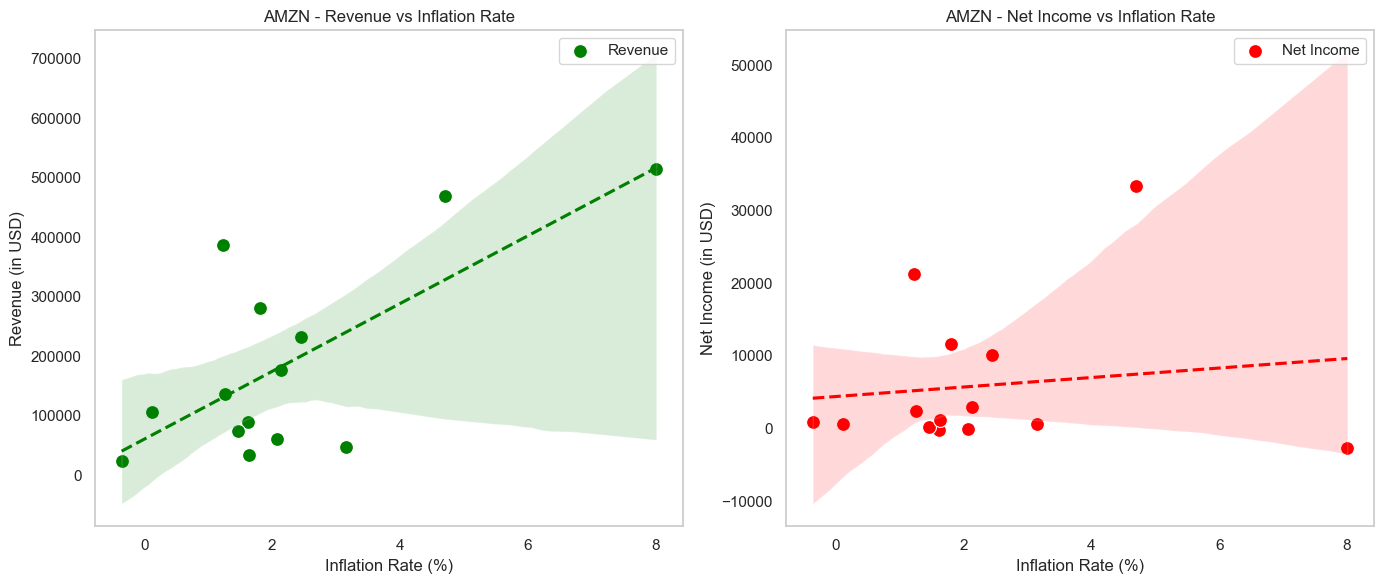

In [19]:
# Let's visualize the impact of inflation on revenue and net income
for company in companies:
    company_data = fs[fs['company'] == company]

    plt.figure(figsize=(14, 6))

    # Revenue vs Inflation Rate
    plt.subplot(1, 2, 1)
    sns.scatterplot(data=company_data, x='inflation rate(in us)', y='revenue', color='green', s=100, label='Revenue')
    sns.regplot(data=company_data, x='inflation rate(in us)', y='revenue', scatter=False, color='green', line_kws={'linestyle':'--'})
    plt.title(f'{company} - Revenue vs Inflation Rate')
    plt.xlabel('Inflation Rate (%)')
    plt.ylabel('Revenue (in USD)')
    plt.grid()

    # Net Income vs Inflation Rate
    plt.subplot(1, 2, 2)
    sns.scatterplot(data=company_data, x='inflation rate(in us)', y='net income', color='red', s=100, label='Net Income')
    sns.regplot(data=company_data, x='inflation rate(in us)', y='net income', scatter=False, color='red', line_kws={'linestyle':'--'})
    plt.title(f'{company} - Net Income vs Inflation Rate')
    plt.xlabel('Inflation Rate (%)')
    plt.ylabel('Net Income (in USD)')
    plt.grid()

    plt.tight_layout()
    plt.show()

### Step 6: Predictive Modeling

In [20]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Fit and transform the 'company' column
fs['company'] = label_encoder.fit_transform(fs['company'])

In [21]:
# Import necessary libraries

from sklearn.model_selection import train_test_split

# Select features and target variable
features = fs[['company','year', 'market cap(in b usd)', 'gross profit', 'net income', 'current ratio', 'debt/equity ratio', 'roe', 'roa', 'roi', 'number of employees', 'inflation rate(in us)']]
target = fs['revenue']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


In [22]:
# Import regression model
from sklearn.linear_model import LinearRegression

# Create and train the regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [23]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Import evaluation metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Absolute Error: 15191.644168257251
Mean Squared Error: 306452927.441275
R^2 Score: 0.9671790197148442



Based on the evaluation metrics, our regression model appears to be performing very well:

**Mean Absolute Error (MAE): 15,191.64**

This indicates that, on average, our predictions are off by about $15,191.64. While this number can be context-dependent (it should be assessed relative to the scale of our data), a lower MAE generally suggests better performance.

**Mean Squared Error (MSE): 306,452,927.44**

This high value suggests that there are some larger errors in the predictions, but again, it needs to be evaluated in the context of the data range. The squaring of the errors penalizes larger mistakes, so the model may need to be examined for outliers.

**R² Score: 0.967**

This score indicates that approximately 96.7% of the variance in the revenue is explained by our model. This is considered an excellent fit, meaning the model captures the relationships in the data very well.



# Financial Analysis Project Documentation

## Table of Contents
1. [Project Overview](#project-overview)
2. [Data Collection](#data-collection)
3. [Data Cleaning and Preprocessing](#data-cleaning-and-preprocessing)
4. [Exploratory Data Analysis (EDA)](#exploratory-data-analysis-eda)
5. [Financial Ratio Analysis](#financial-ratio-analysis)
6. [Trend Analysis](#trend-analysis)
7. [Cash Flow Analysis](#cash-flow-analysis)
8. [Employee and Inflation Impact Analysis](#employee-and-inflation-impact-analysis)
9. [Predictive Modeling](#predictive-modeling)
10. [Conclusion](#conclusion)

## Project Overview
The goal of this project is to conduct a comprehensive financial analysis of ten companies over a specified period. The analysis includes exploratory data analysis, financial ratio analysis, trend analysis, DuPont analysis, cash flow analysis, and predictive modeling to forecast future financial metrics.

## Data Collection
The dataset comprises historical financial data from ten companies, including the following key columns:
- `year`
- `company`
- `category`
- `market cap (in b USD)`
- `revenue`
- `net income`
- `roe` (Return on Equity)
- `current ratio`
- `debt/equity ratio`
- `cash flow from operating`
- `number of employees`
- `inflation rate (in US)`

## Data Cleaning and Preprocessing
The data was cleaned to ensure consistency and correctness:
- Removed duplicates and irrelevant columns.
- Handled missing values where necessary.
- Converted categorical columns to numerical values using Label Encoding.

## Exploratory Data Analysis (EDA)
In this phase, we summarized the dataset and visualized key metrics:
- Analyzed unique values in critical columns (e.g., `company`, `category`).
- Visualized important financial metrics such as `market cap`, `revenue`, and `net income` for each company over the years.

## Financial Ratio Analysis
We analyzed various financial ratios to assess company health:
- **Profitability Ratios:** ROE, Net Profit Margin
- **Liquidity Ratios:** Current Ratio
- **Solvency Ratios:** Debt/Equity Ratio

Visualizations were created to illustrate these metrics for comparative analysis across companies.

## Trend Analysis
Trend analysis was conducted for each company to observe the performance of key financial metrics (revenue, net income, and more) over the years. Line graphs illustrated these trends clearly.


## Cash Flow Analysis
Cash flow analysis included visualizations of:
- Cash flow from operating activities
- Cash flow from investing activities
- Cash flow from financial activities

Each company's cash flow metrics were visualized over the years to assess liquidity and financial health.

## Employee and Inflation Impact Analysis
We examined the impact of employee count and inflation on financial performance metrics, visualizing these relationships to understand how they affect company outcomes.

## Predictive Modeling
A regression-based model was developed to forecast future financial metrics, such as revenue. The model was trained and tested using:
- **Mean Absolute Error (MAE)**
- **Mean Squared Error (MSE)**
- **R² Score**

Label encoding was applied to the `company` variable to facilitate the regression analysis.

## Conclusion
This project provided valuable insights into the financial health and performance of the analyzed companies. The various analyses conducted, including financial ratio assessments, trend analysis, and predictive modeling, demonstrate the importance of historical financial data in making informed business decisions. The predictive model also shows promise in forecasting future performance based on historical trends.

### Future Work
Future work could include deeper dives into industry comparisons, advanced predictive modeling techniques, and incorporating additional financial metrics for a more robust analysis.